### HR Analytics Project- Understanding the Attrition in HR

Project Description:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


HR Analytics:
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


Attrition in HR:
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.


How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies.


A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#pd.set_option("display.max_rows", None)  
pd.set_option("display.max_columns", None)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Attrition is our target variable.

In [6]:
df['attrition']=df['Attrition']
df=df.drop('Attrition', axis=1)

In [7]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [8]:
df.duplicated().sum()

0

No duplicate rows present

In [9]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

No null values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# number of unique values in each column
df.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

'EmployeeNumber' holds 1470 unique value which means these values are different for every row. we can delete this.

We can observe 'EmployeeCount','Over18' and'StandardHours' columns are with only 1 unique value. let's study them first.

In [13]:
li=['EmployeeCount','Over18', 'StandardHours']
for i in li:
    print(i, df[i].unique())

EmployeeCount [1]
Over18 ['Y']
StandardHours [80]


Since these columns got only one value, they don't hold much of the unique information we need for the dataset as these values are common for every row in the dataset.

In [14]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [15]:
df=df.drop(['EmployeeCount','Over18', 'StandardHours','EmployeeNumber'], axis=1)
df.shape

(1470, 31)

In [16]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [17]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

There is skewness in the data.

#### Sort continuous and categorical column names

In [18]:
con=df.select_dtypes(include= 'number').columns    #continous columns
con

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
cat=df.select_dtypes(exclude= 'number').columns    #categorical columns
cat

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'attrition'],
      dtype='object')

#### More on Understanding columns

In [20]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Male      882
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

OverTime
No     1054
Yes     416
Name: OverTime, 

'BusinessTravel' column got 'Travel_Rarely' as major class. 

Most of the employees belong to 'Research & Development' department.

Male employees are more in number.

Most of the people work only for standard hours and not overtime.

In [21]:
df['attrition'].value_counts()

No     1233
Yes     237
Name: attrition, dtype: int64

Target variable seems unbalanced where 'No' value is the majority class.

In [22]:
for i in con:
    if df[i].nunique() <20:
        print("Column: ",i)
        print(df[i].unique())
        print()

Column:  Education
[2 1 4 3 5]

Column:  EnvironmentSatisfaction
[2 3 4 1]

Column:  JobInvolvement
[3 2 4 1]

Column:  JobLevel
[2 1 3 4 5]

Column:  JobSatisfaction
[4 2 3 1]

Column:  NumCompaniesWorked
[8 1 6 9 0 4 5 2 7 3]

Column:  PercentSalaryHike
[11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]

Column:  PerformanceRating
[3 4]

Column:  RelationshipSatisfaction
[1 4 2 3]

Column:  StockOptionLevel
[0 1 3 2]

Column:  TrainingTimesLastYear
[0 3 2 5 1 4 6]

Column:  WorkLifeBalance
[1 3 2 4]

Column:  YearsInCurrentRole
[ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]

Column:  YearsSinceLastPromotion
[ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]

Column:  YearsWithCurrManager
[ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]



we can observe that many of the above columns like 'Education', 'Job level' and others are categories though they are int datatype. these columns don't need encoding or scaling at the later stage.

#### Distribution plot and skewness of continous columns

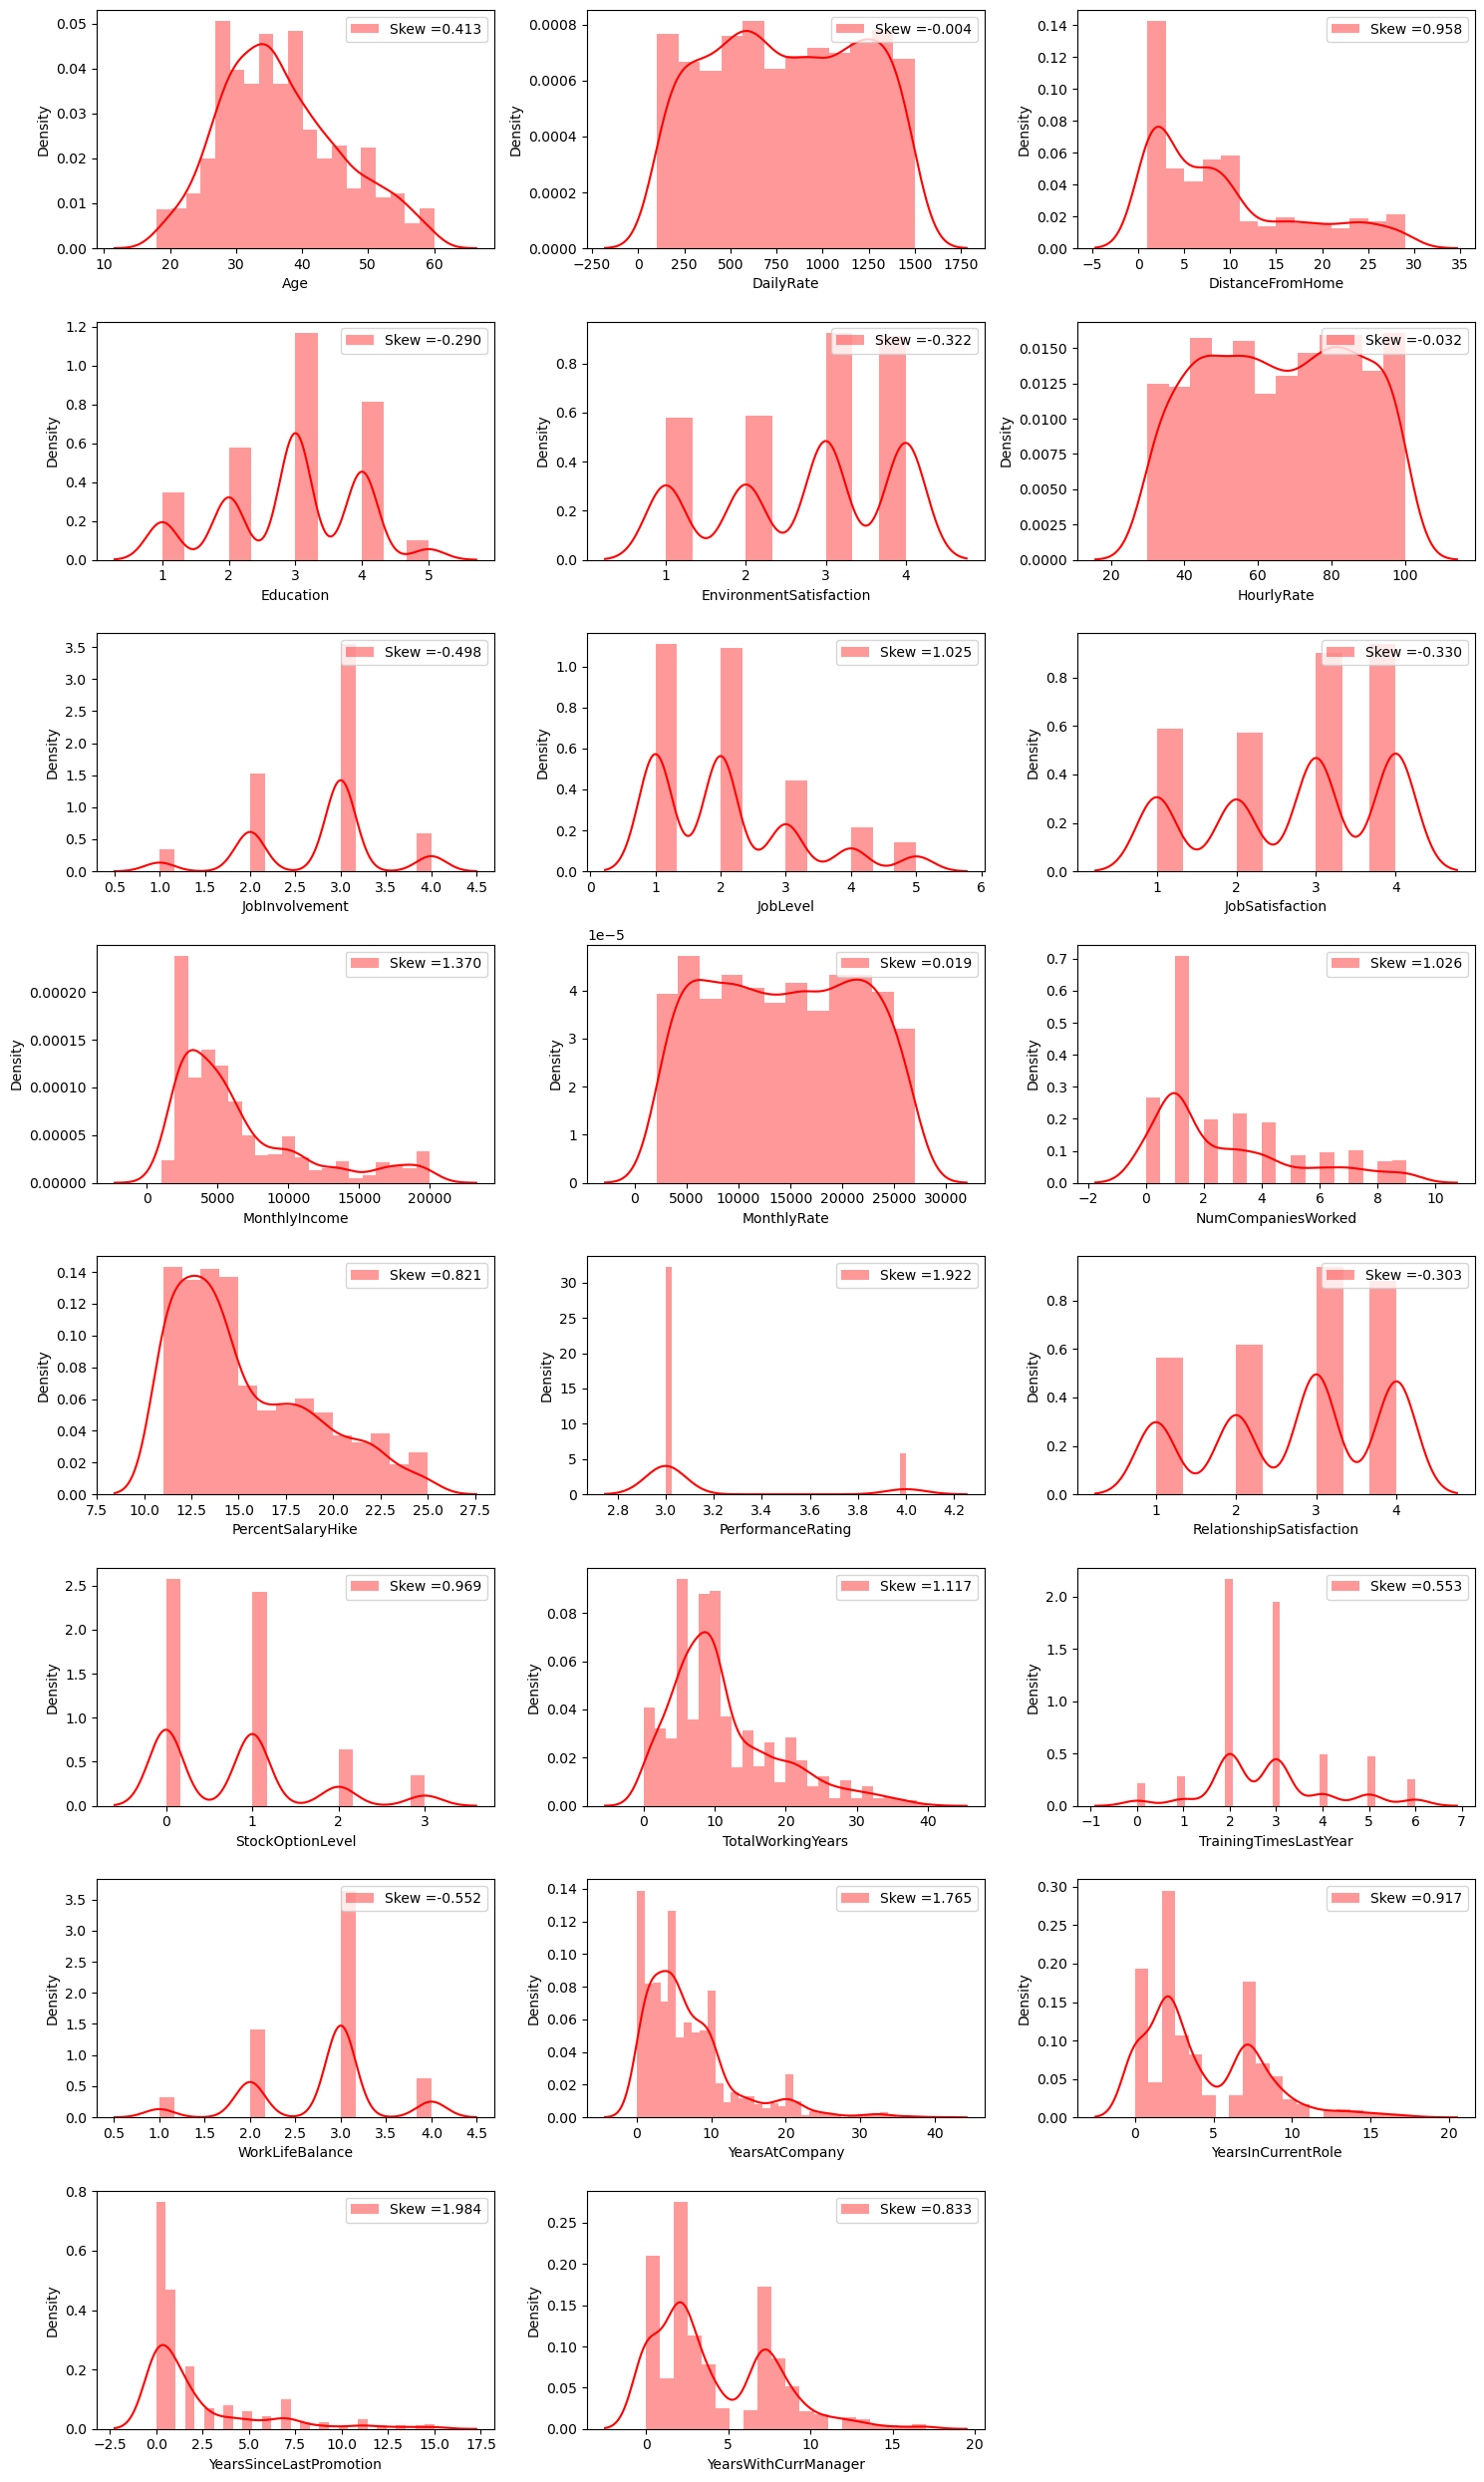

In [23]:
# Distribution plot and skewness
plt.figure(figsize=(15,25))
c=1
for i in con:
    plt.subplot(8,3,c)
    skew= df[i].skew()
    sns.distplot(df[i], color='red', label= 'Skew =%.3f' %skew)
    plt.legend(loc='upper right')
    c+=1
    
plt.tight_layout()

### Visualisation

In [24]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'attrition'],
      dtype='object')

<AxesSubplot: ylabel='BusinessTravel'>

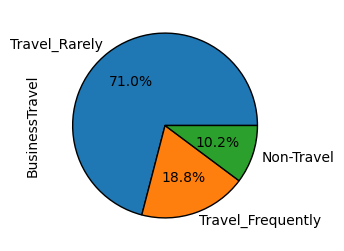

In [25]:
#BusinessTravel
plt.figure(figsize=(3,3))
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = {"edgecolor" : "Black",'linewidth':1})

18.8% of the Employees travel frequently whereas majority of the Employees (71%) rarely travel.

[Text(0, 0, '887'), Text(0, 0, '208'), Text(0, 0, '138')]

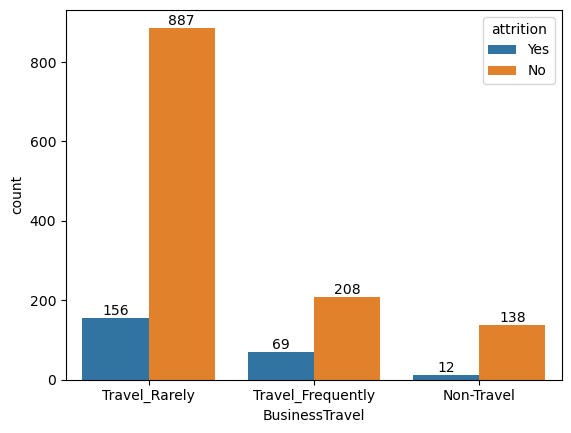

In [26]:
#BusinessTravel w.r.t attrition
ax= sns.countplot(x=df['BusinessTravel'], hue=df['attrition'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

In [27]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'attrition'],
      dtype='object')

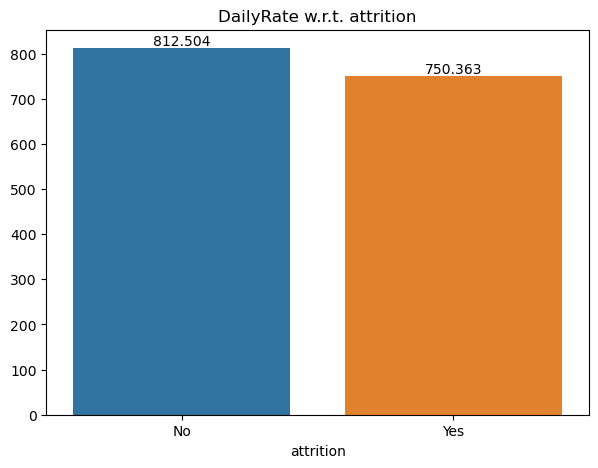

In [28]:
# dailyrate with respect to attrition

#li=['MonthlyIncome', 'MonthlyRate', 'DailyRate']

#for i in li:
m= df.groupby('attrition')['DailyRate'].mean()

plt.figure(figsize=(7,5))
ax=sns.barplot(y=m.values, x=m.index)
plt.bar_label(ax.containers[0])
plt.title("DailyRate w.r.t. attrition")
    
plt.show()

Dailyrate of attrited employees is less.

Most of the employees belong to R&D department.

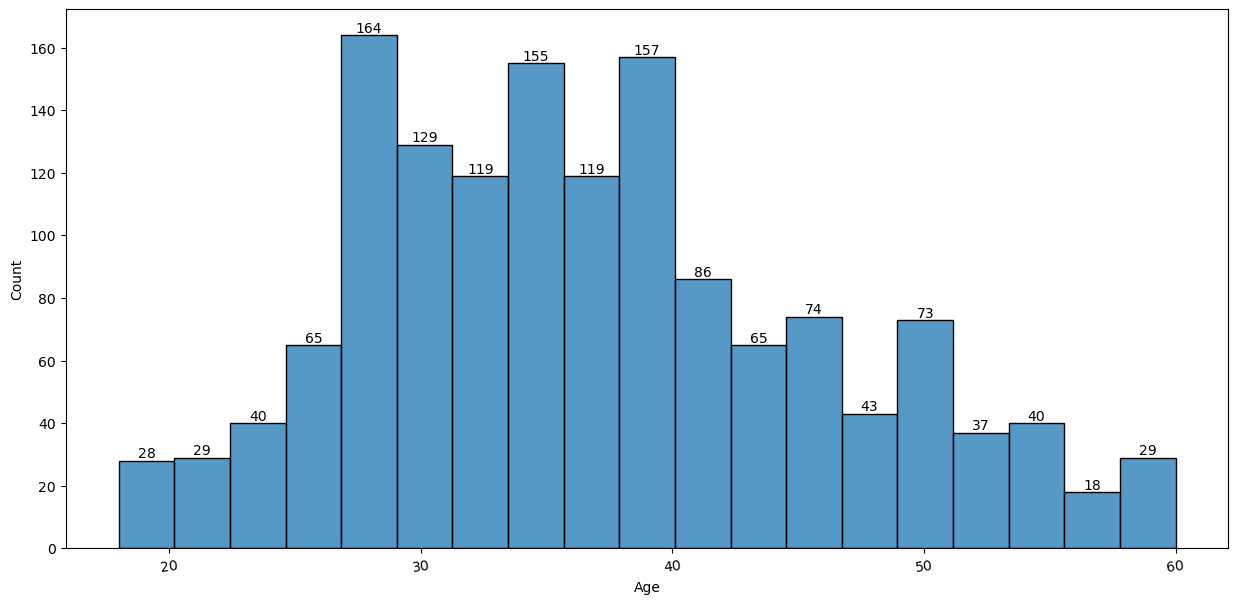

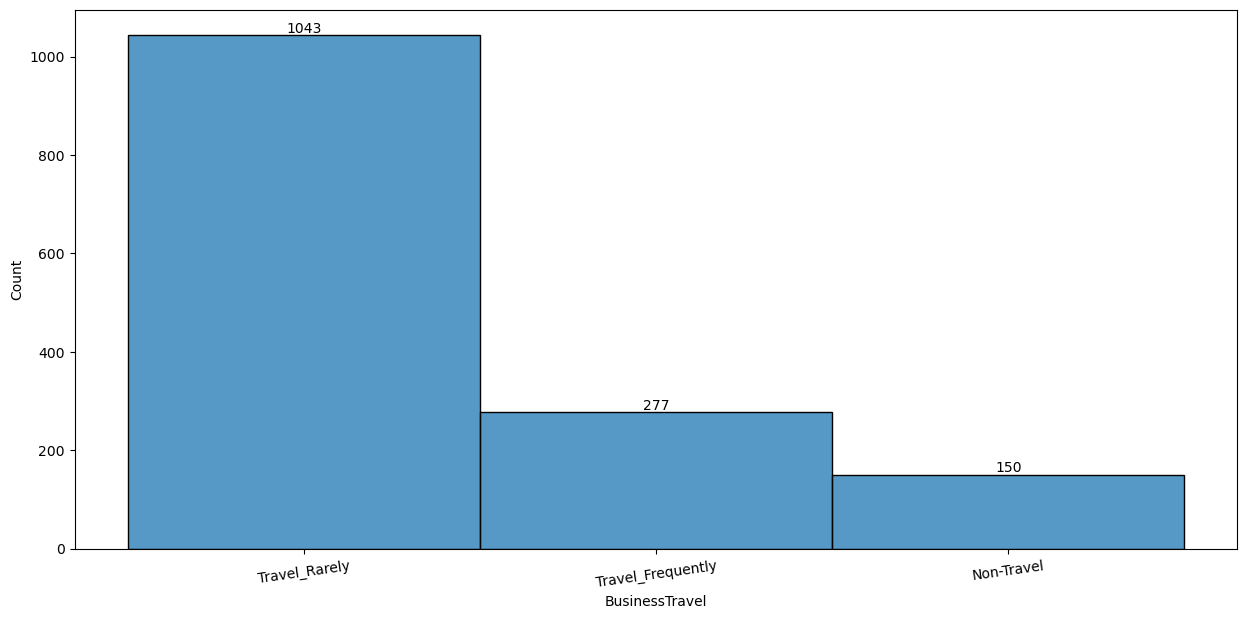

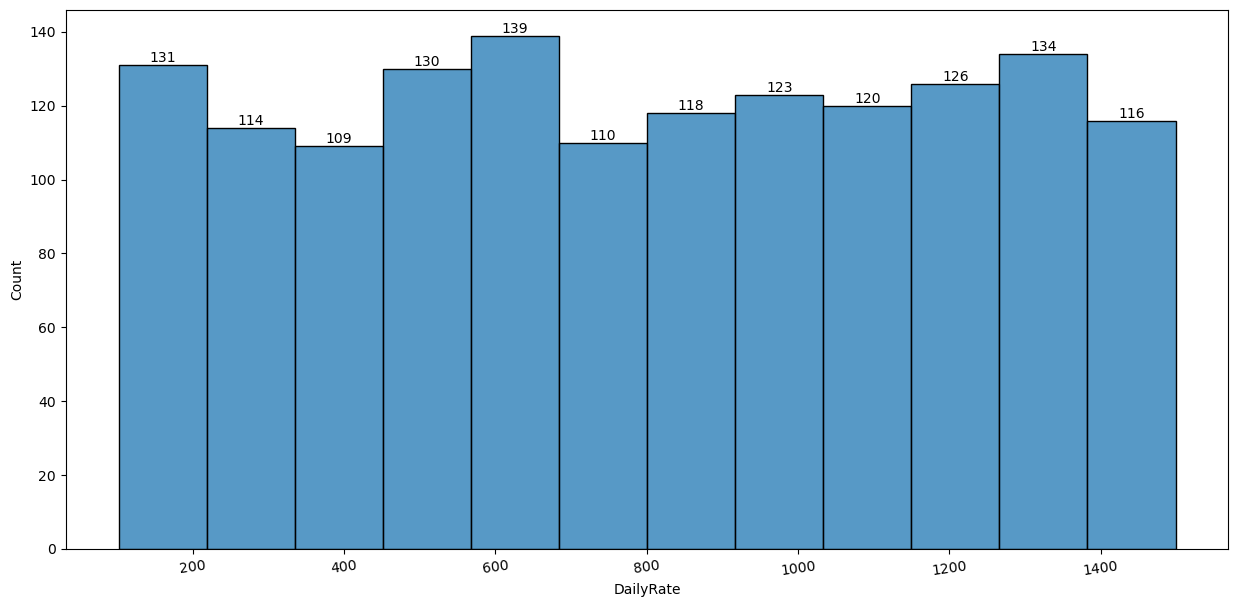

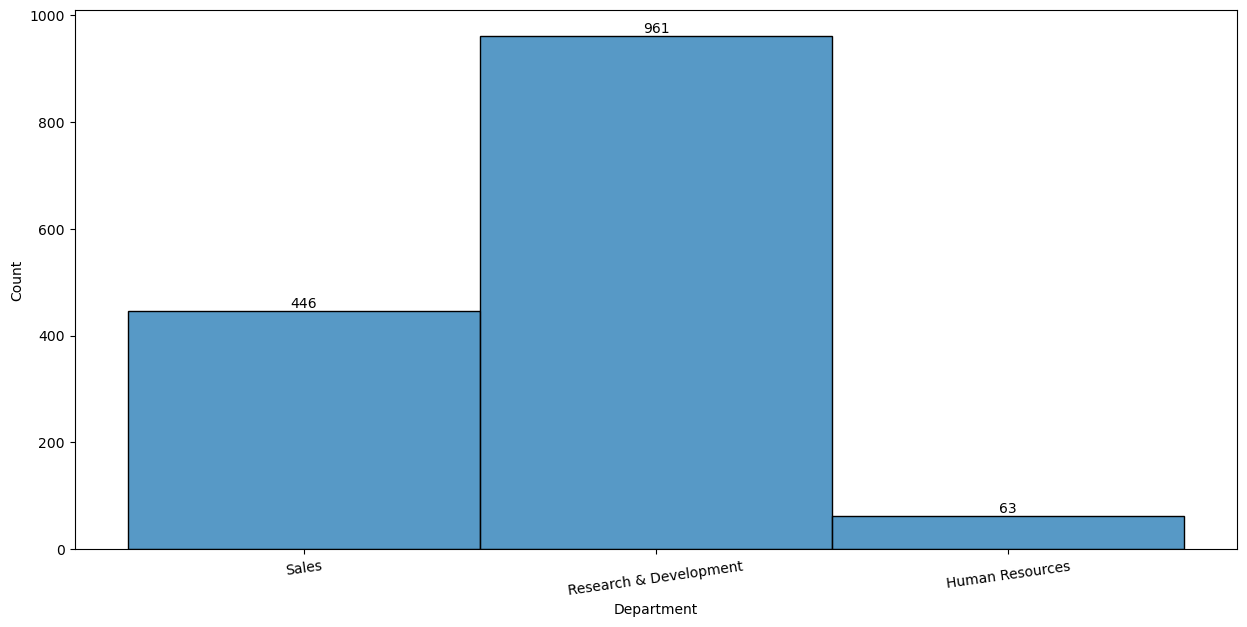

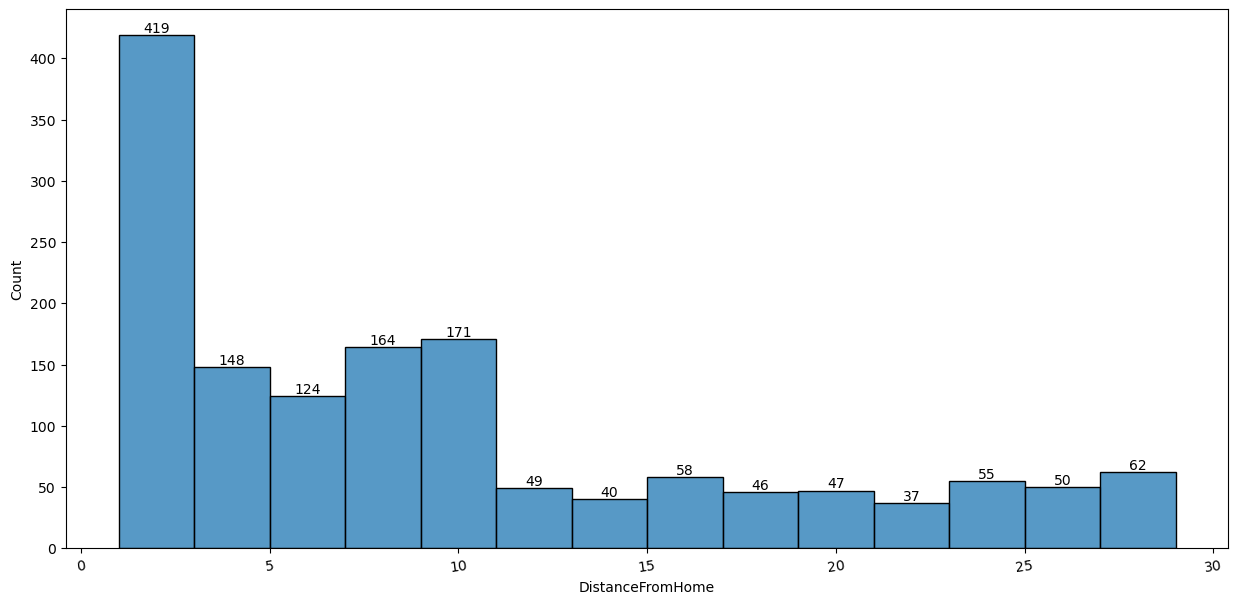

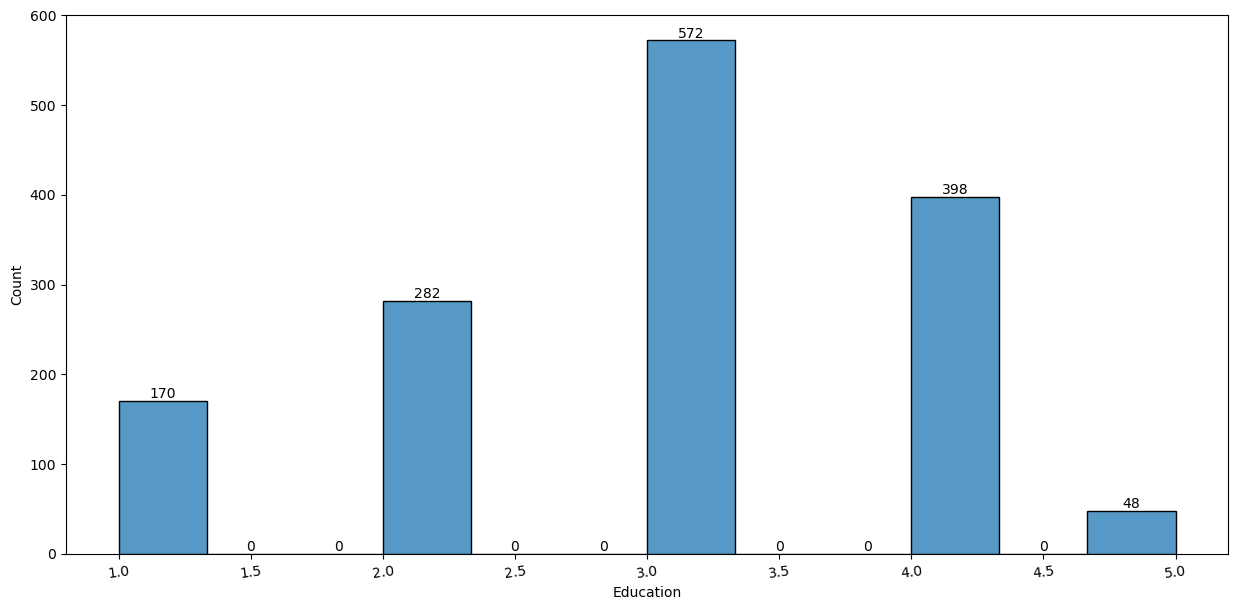

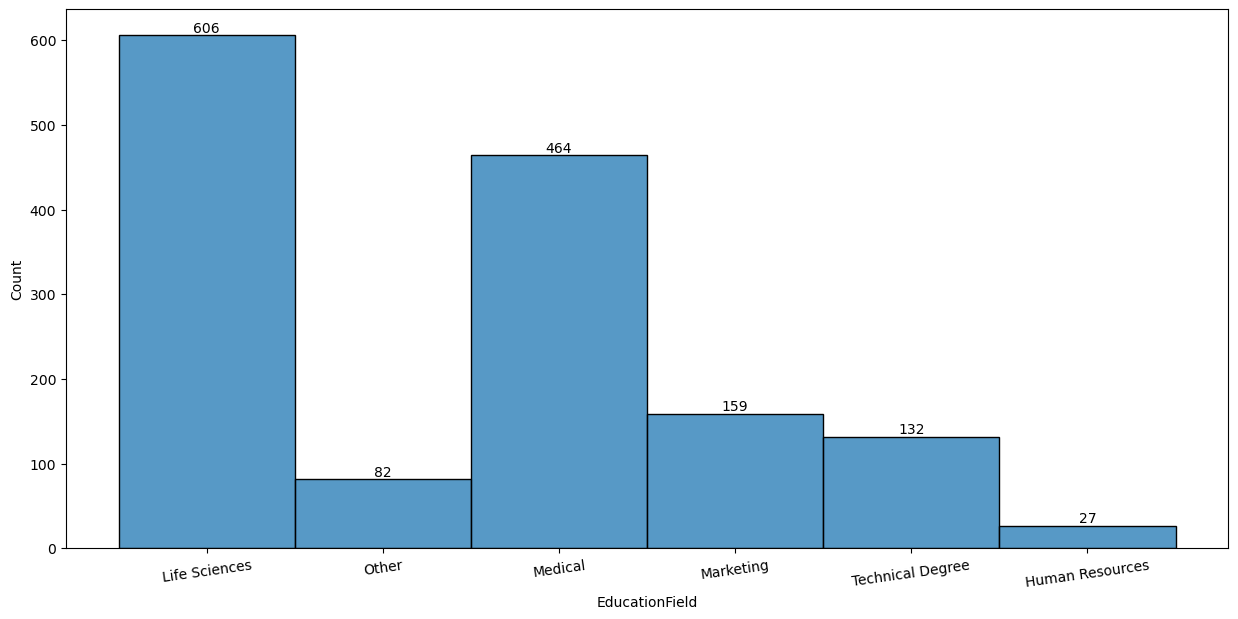

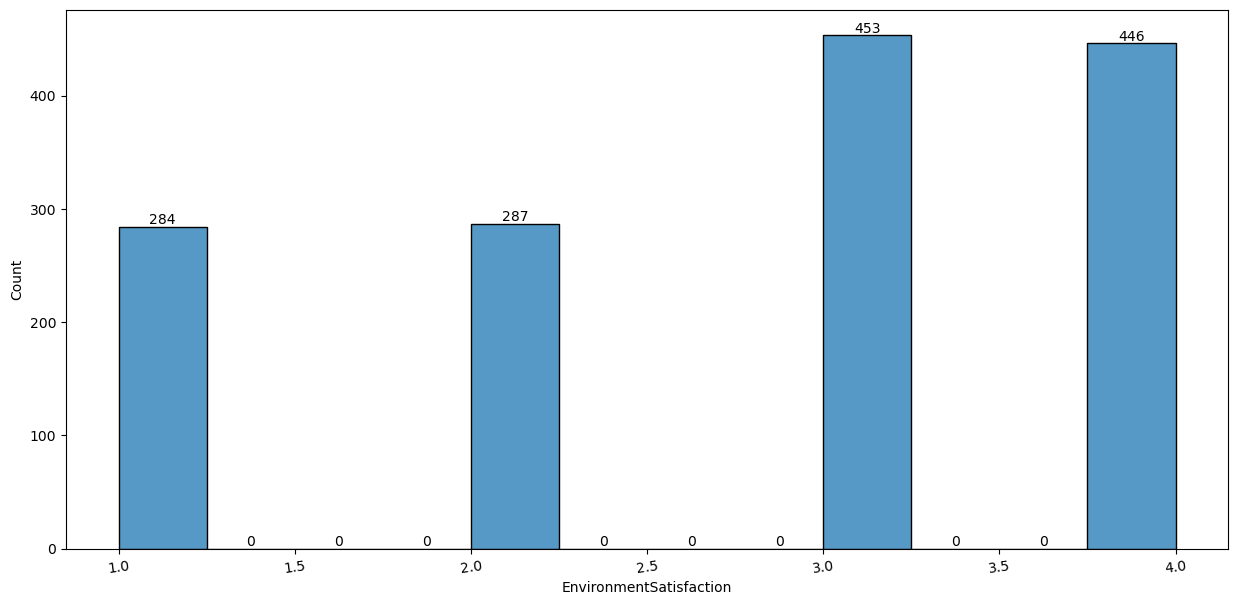

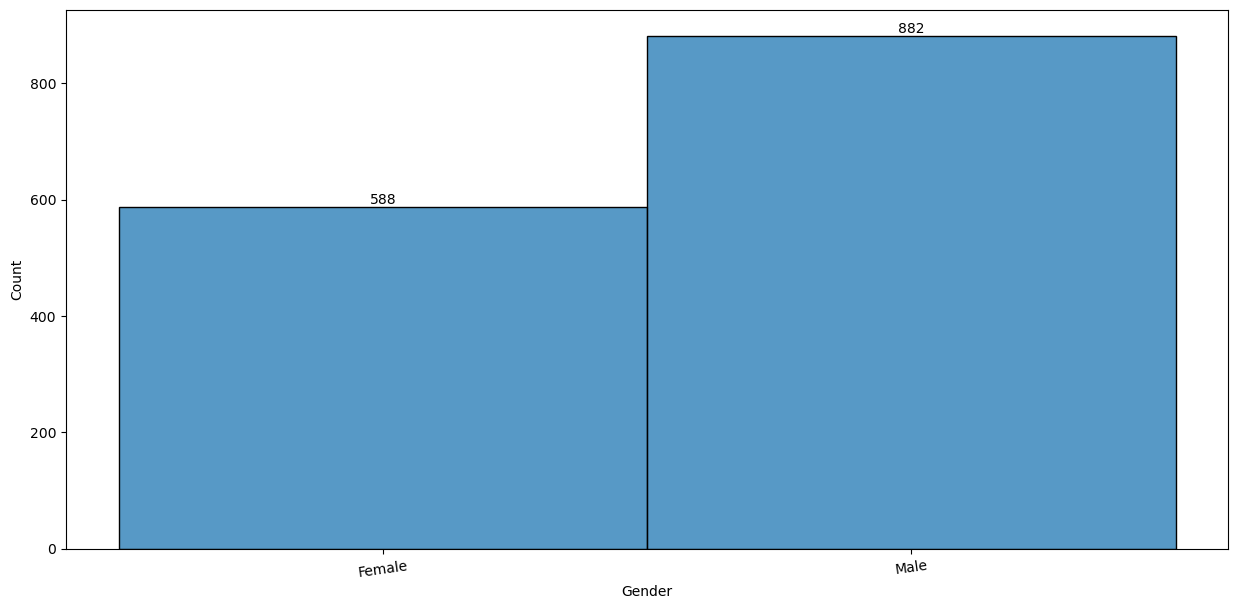

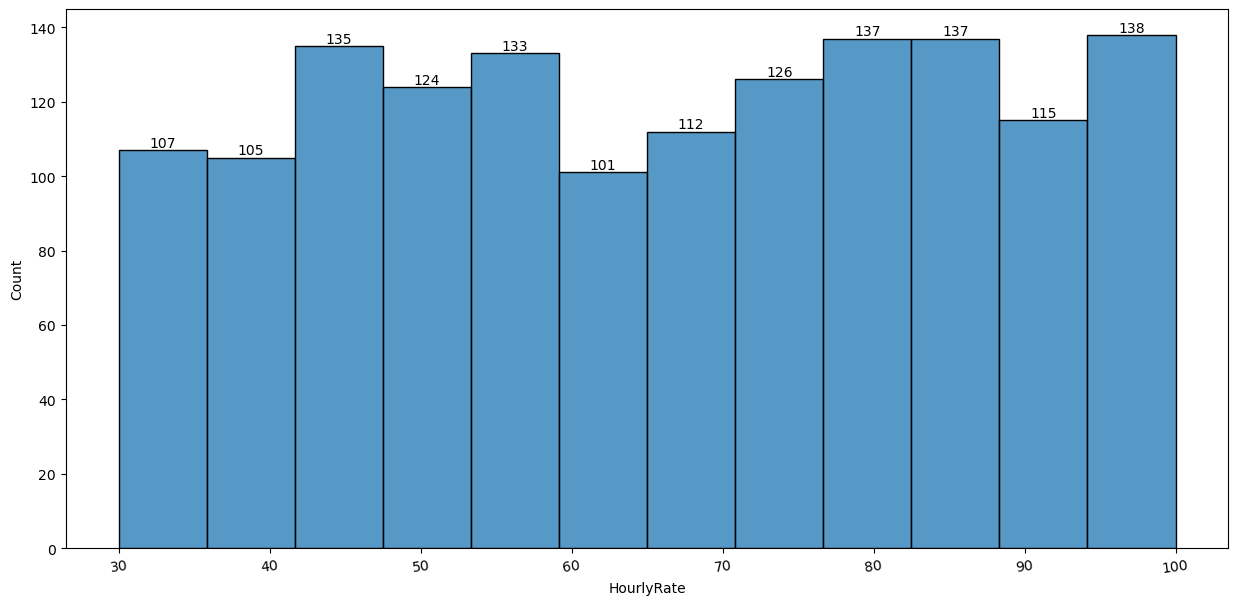

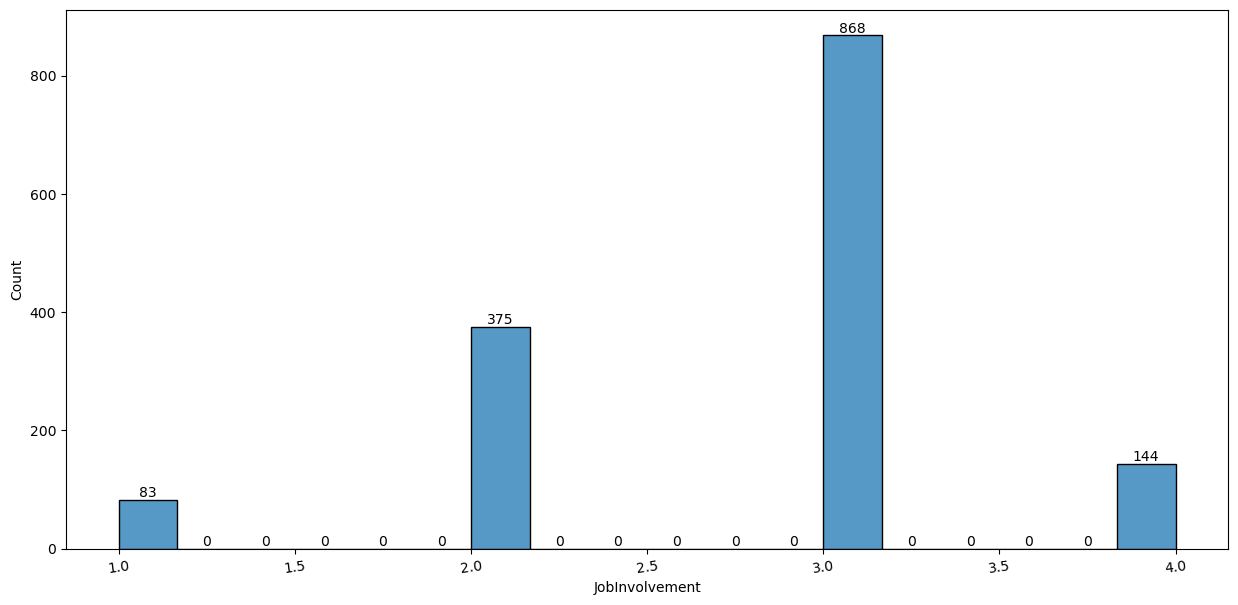

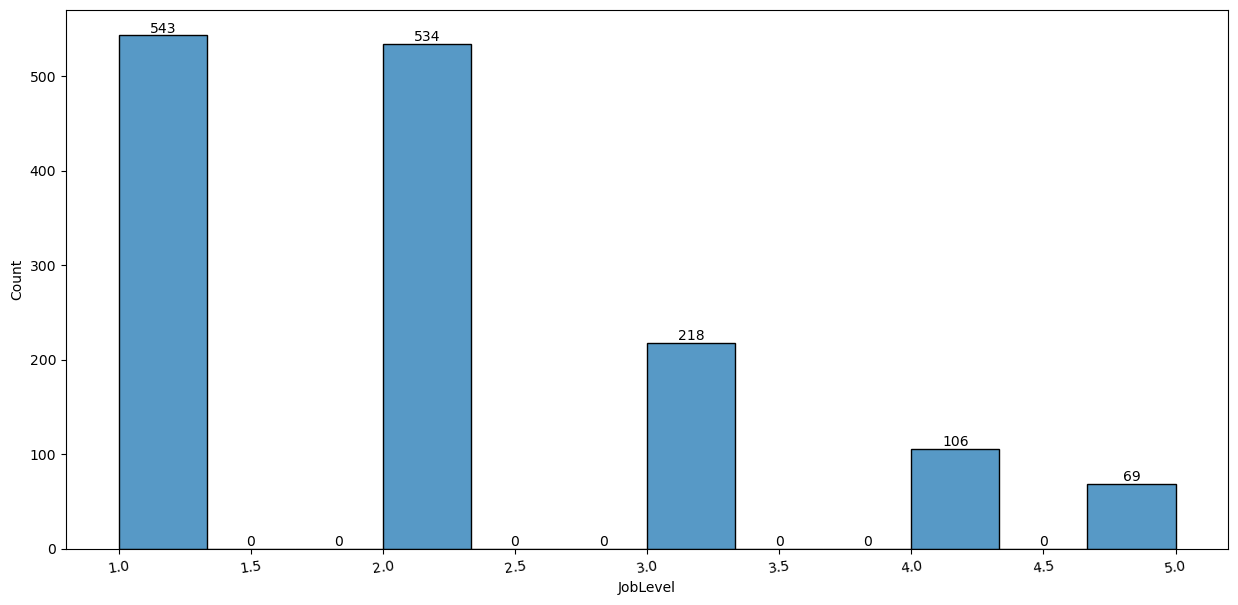

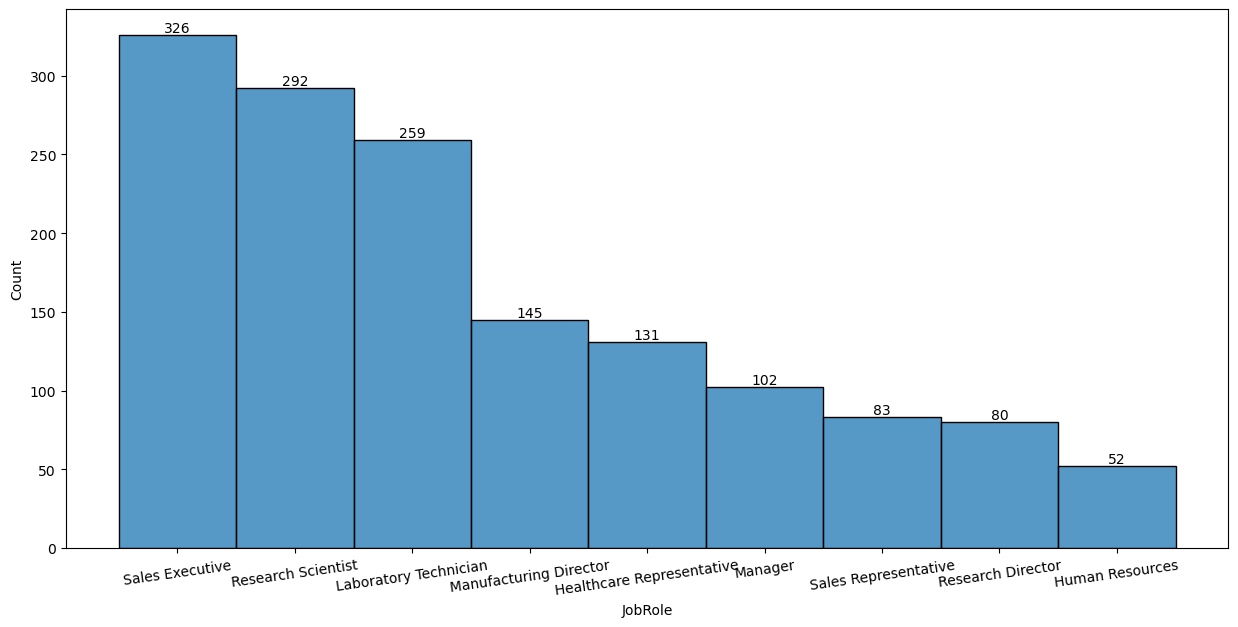

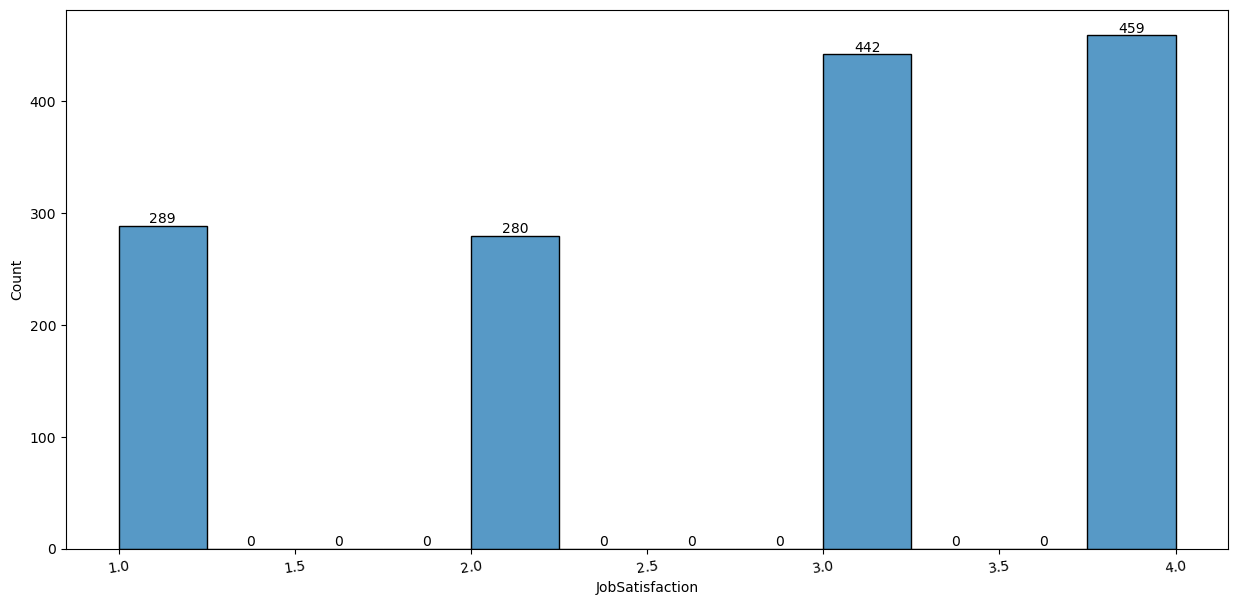

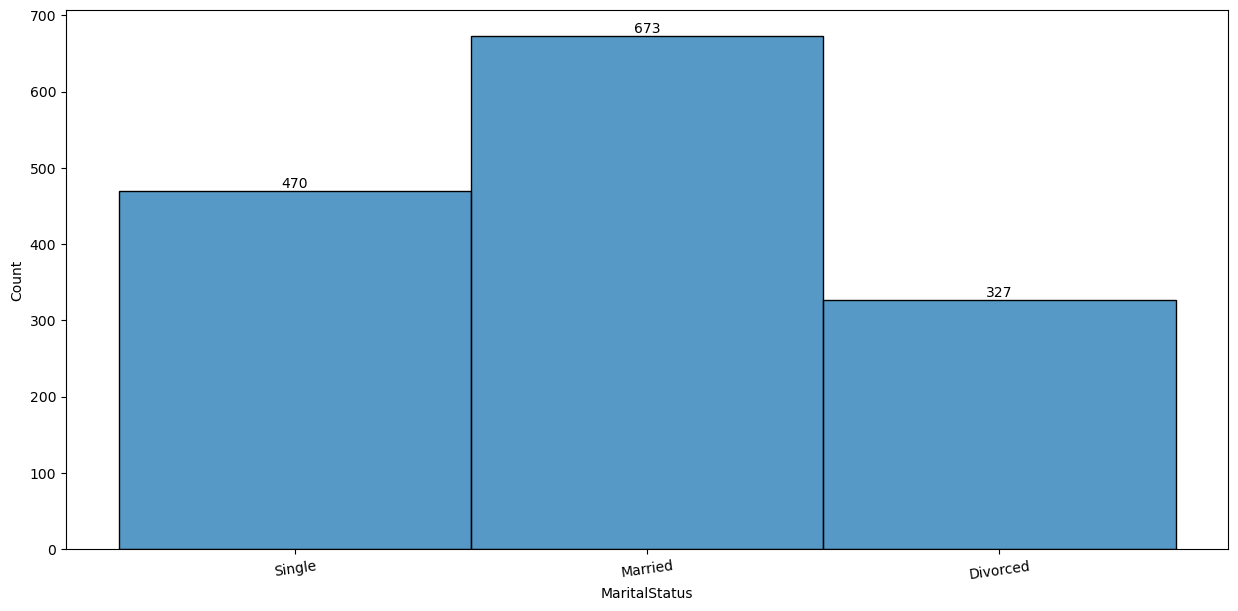

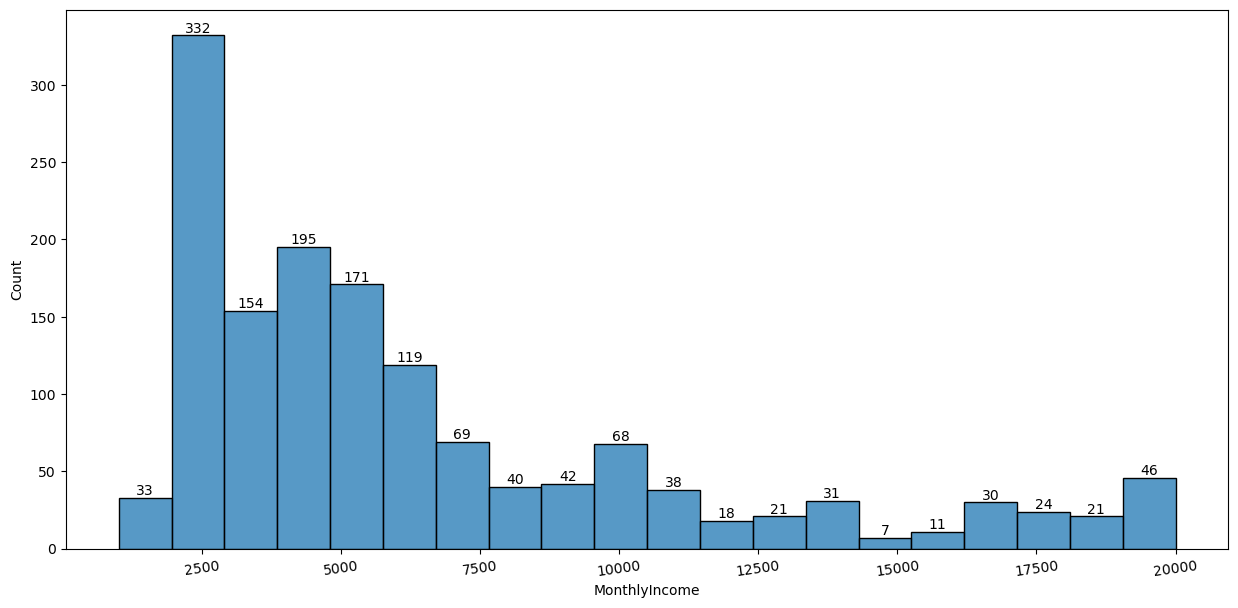

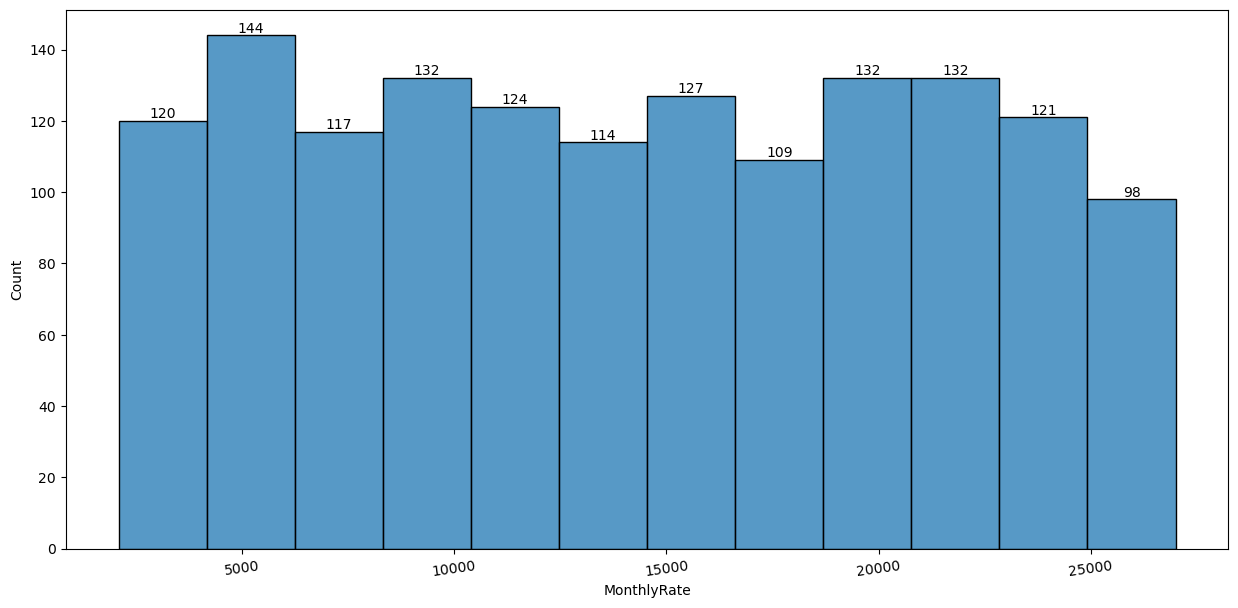

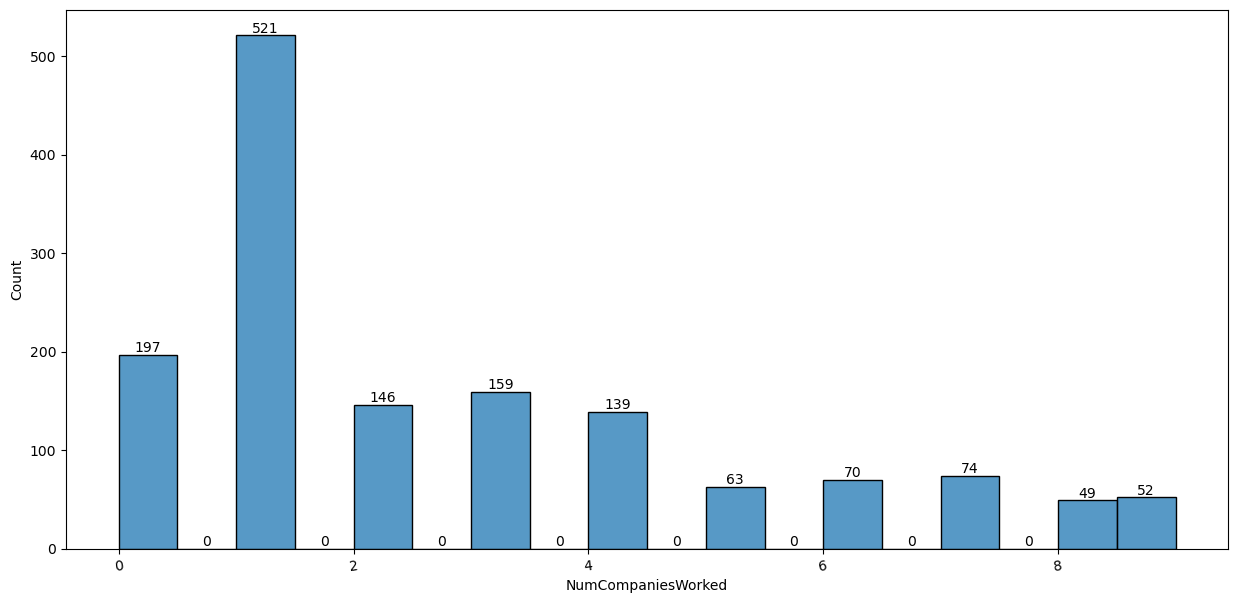

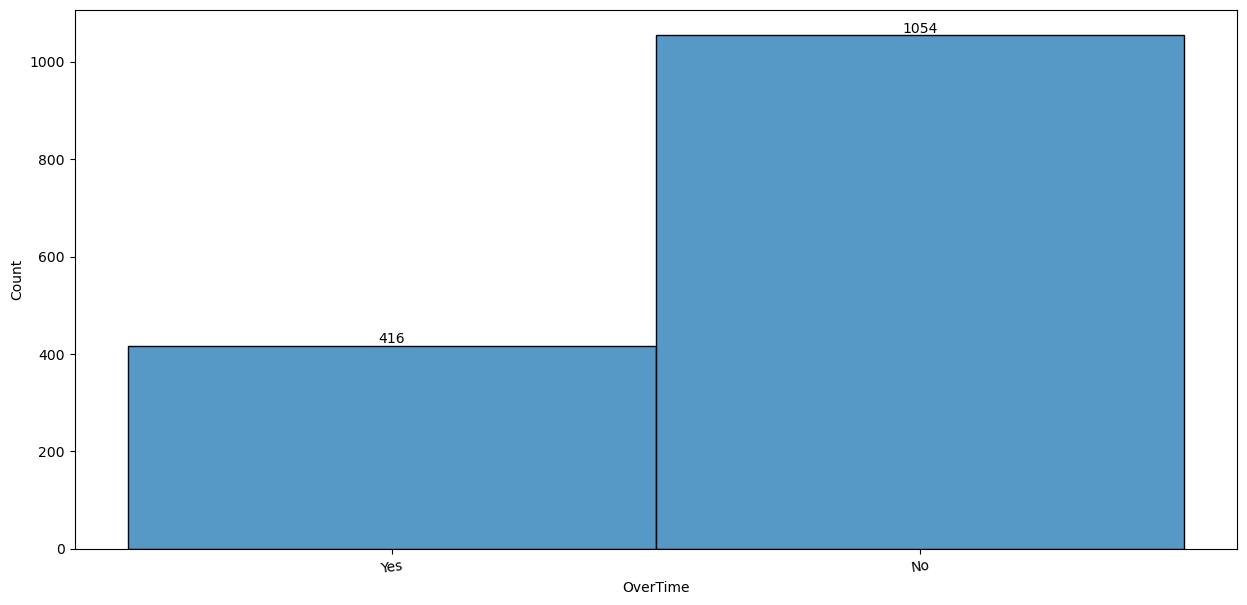

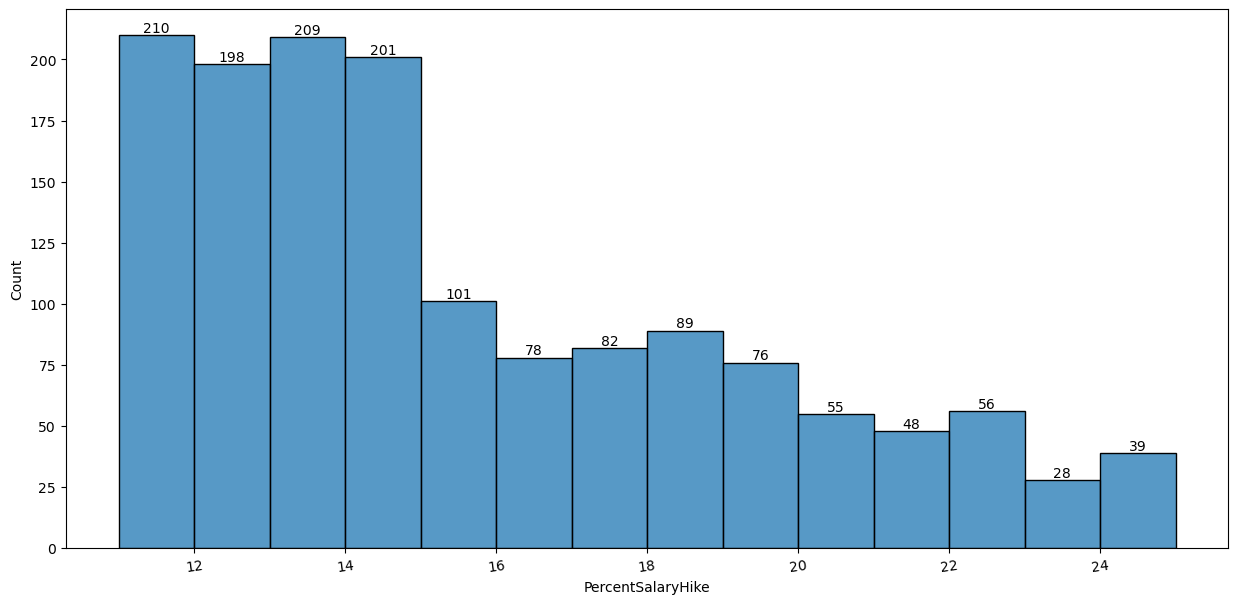

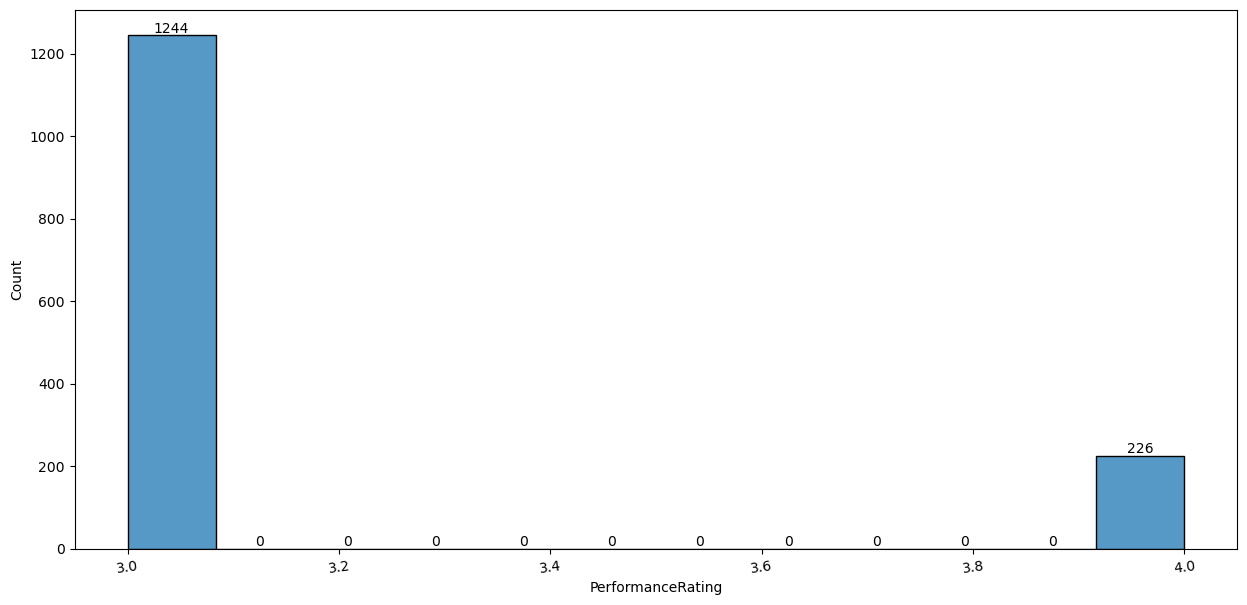

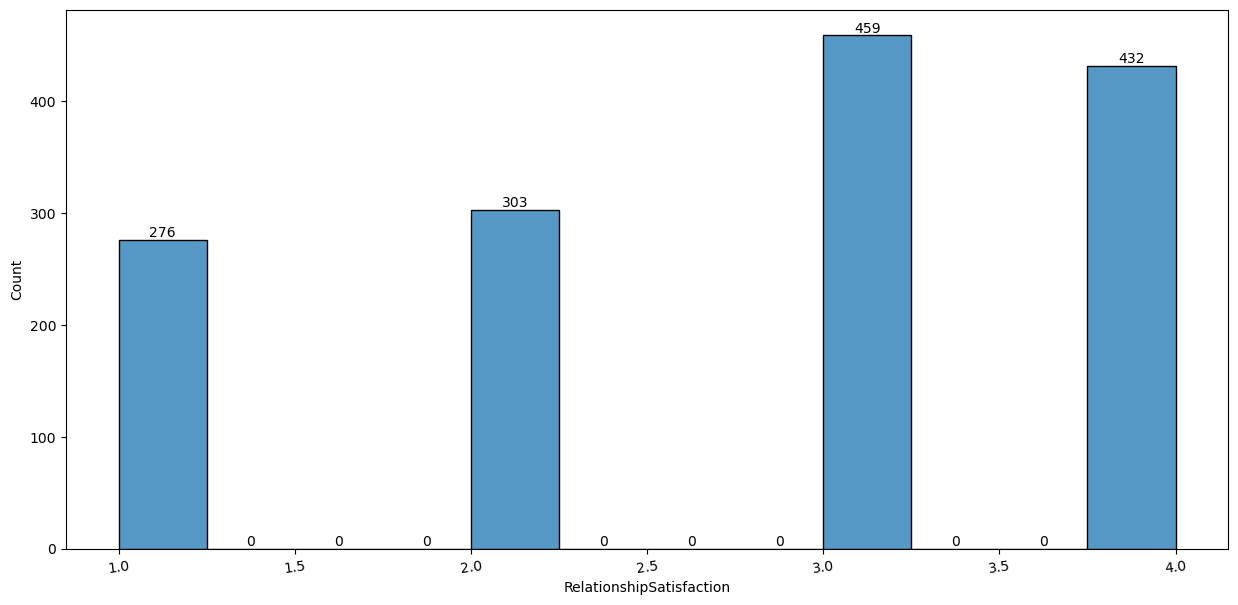

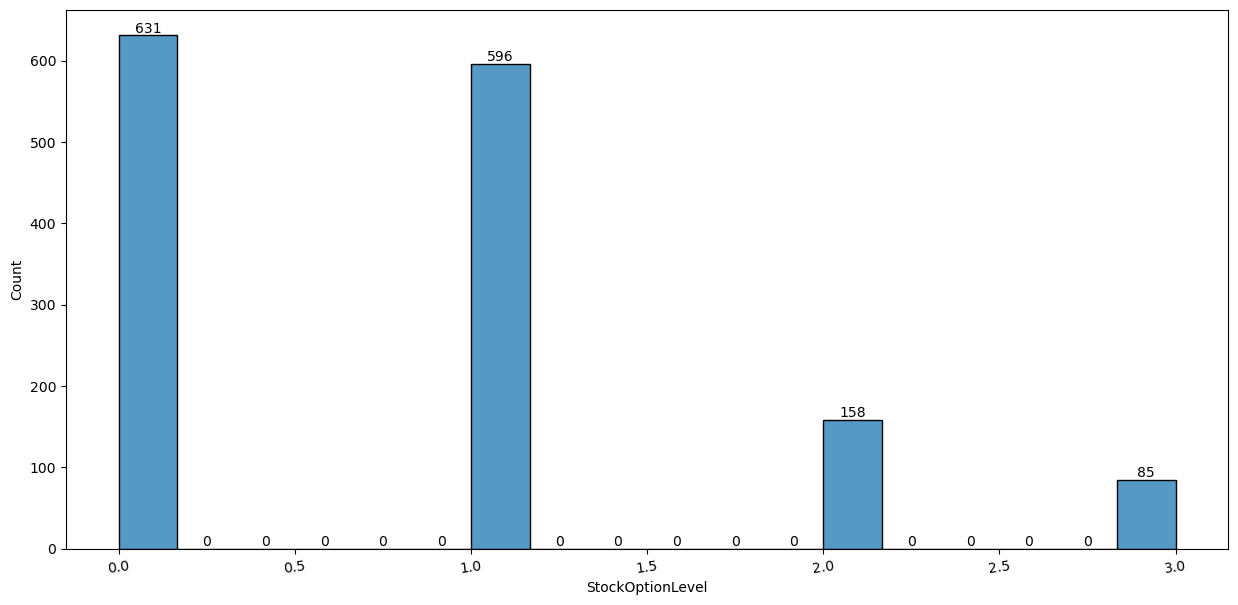

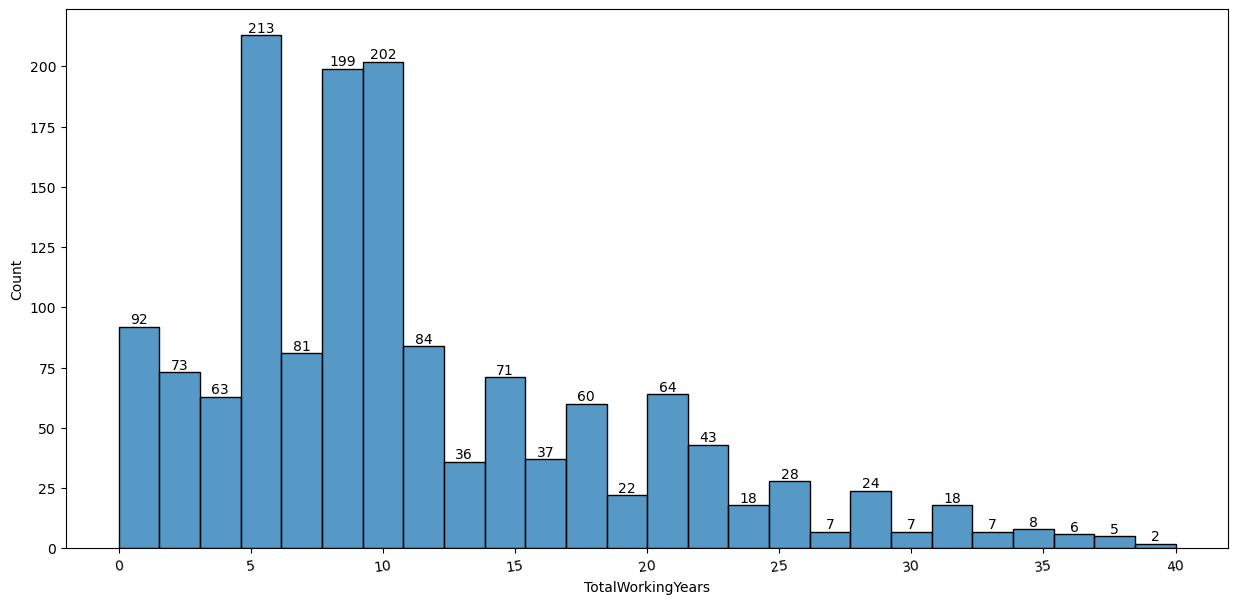

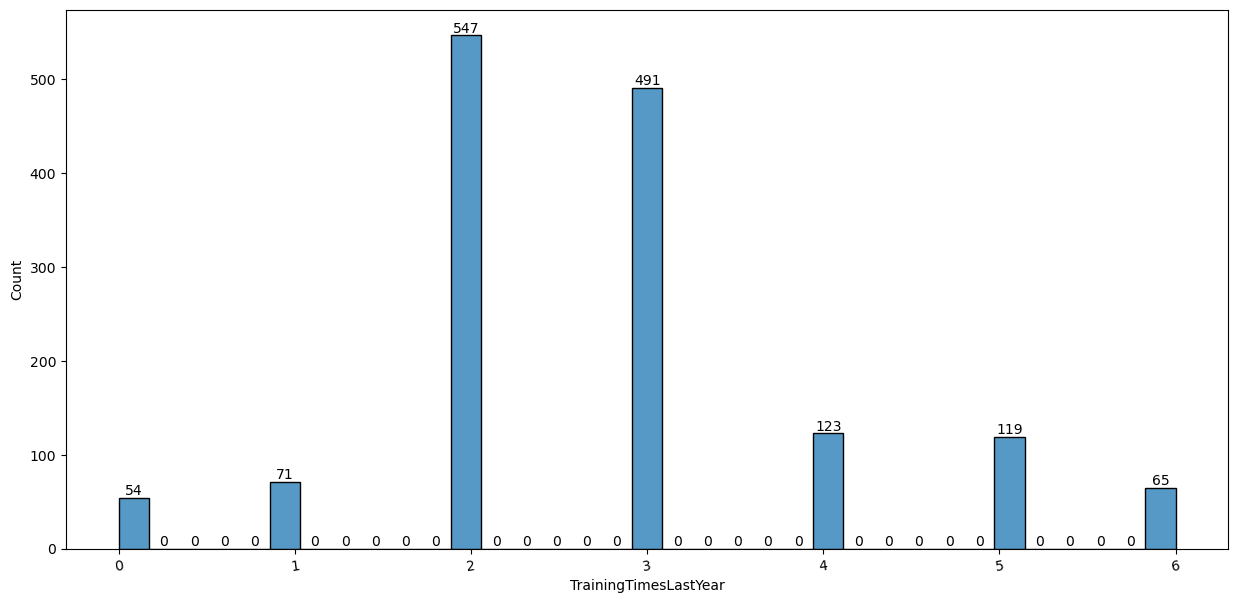

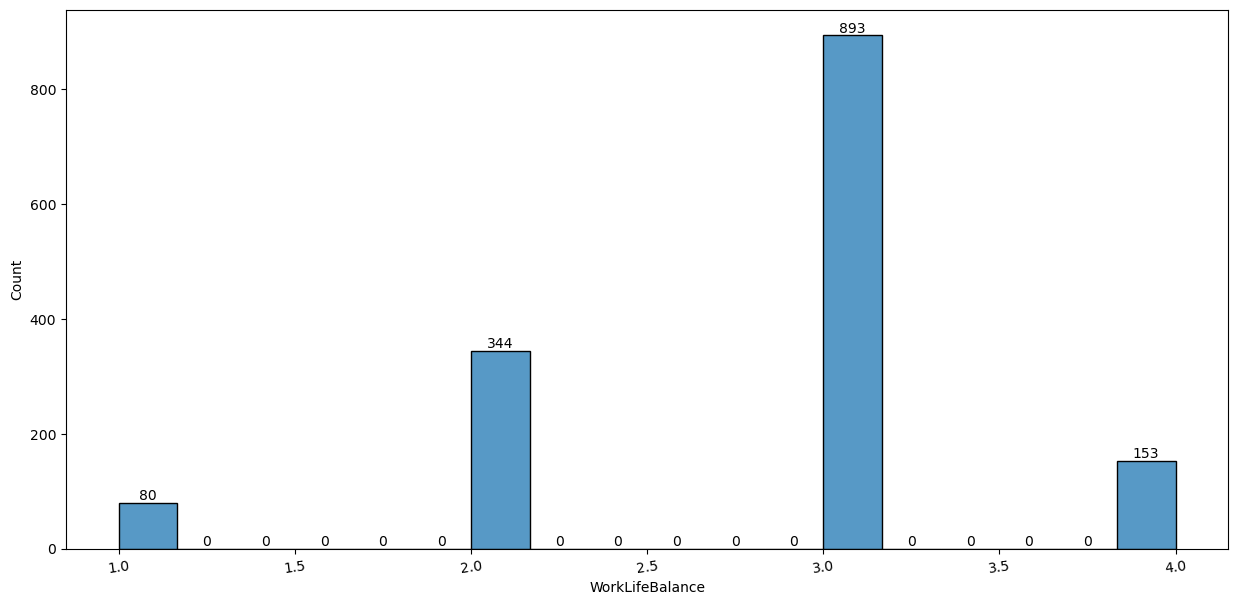

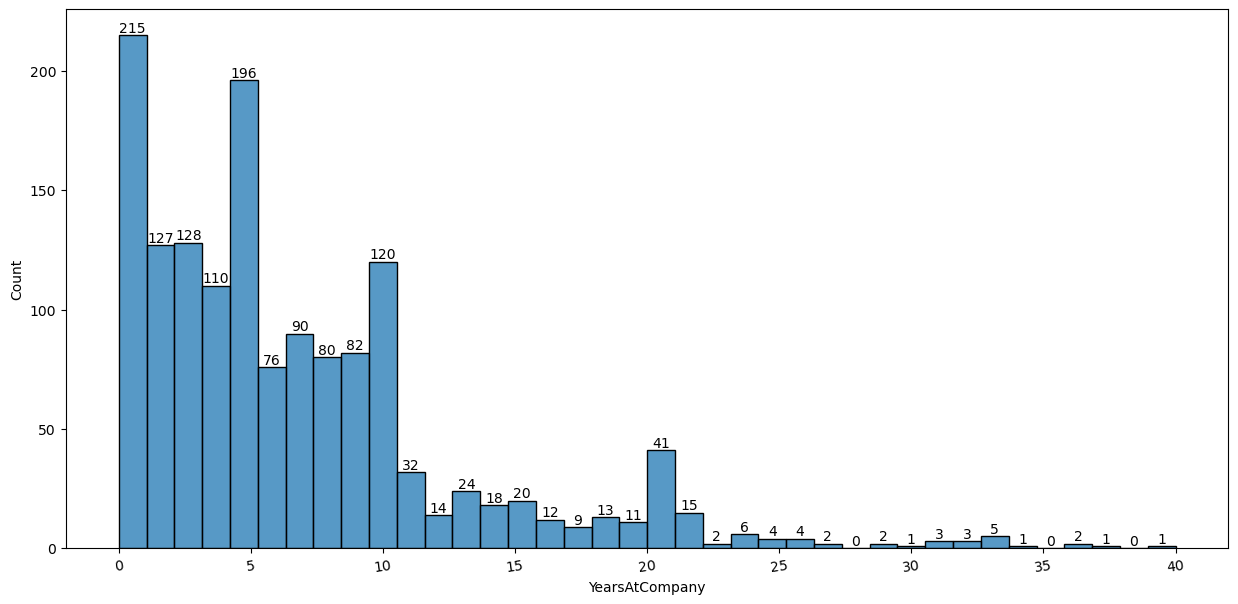

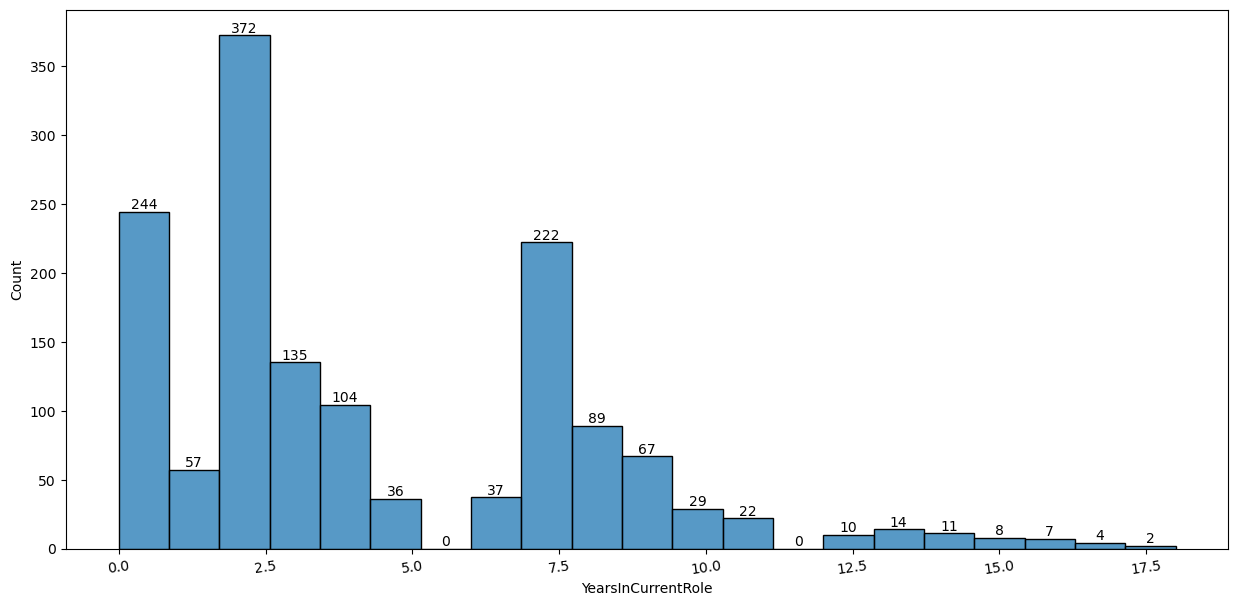

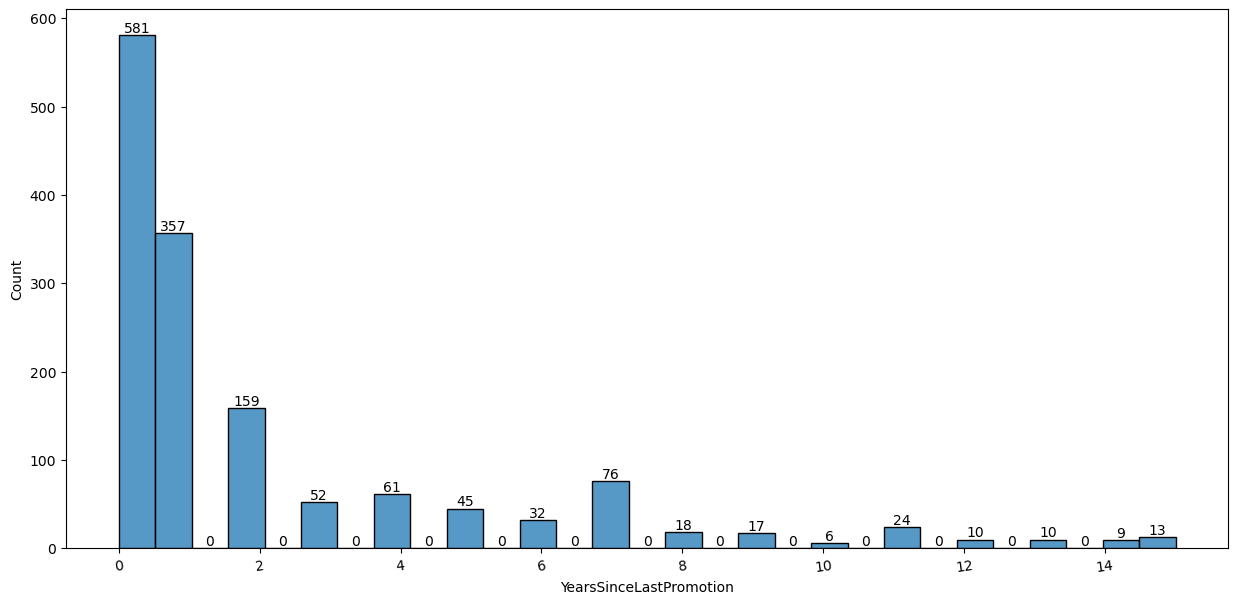

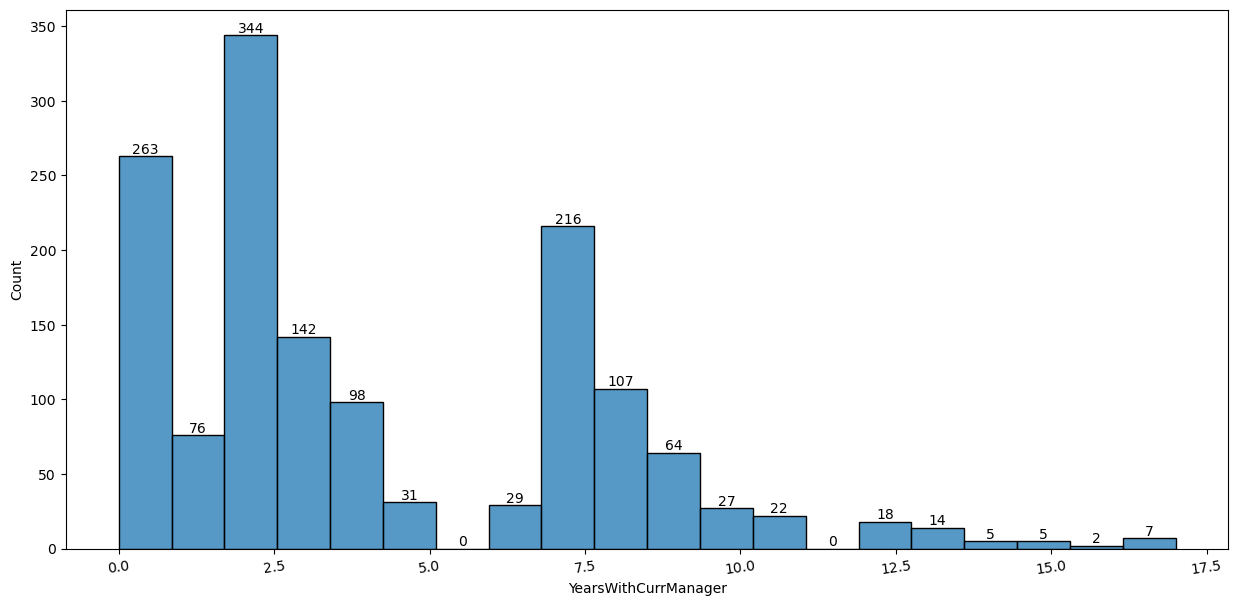

In [29]:
for i in df.columns[:-1]:
    plt.figure(figsize=(15,7))
    ax=sns.histplot(df[i])
    plt.bar_label(ax.containers[1])
    plt.xticks(rotation=8)

Age- 
Majority of the employees belong to the age group of 25-45 years.
There are also employees with age greater than 55 years.


Bussiness Travel-
Majority of the employees rarely travel.


Department-
Most of the employees belong to R&D department.


DistanceFromHome-
Most of the employees live within 10kms from the job location while there are also employees who live more than 20kms away.


Education-
Considering: 
level1 = 10th class
level2 = 12th class
level3 = Graduate
level4 = Post Graduate
level5 = PhD

572 employees are level 3 educated (Graduate) which is highest count.


EducationField-
Life Science and Medical fields account for 1070 employees.


Gender-
882 of the employees are males whereas other 588 employees are females.


HourlyRate-
The minimum HourlyRate is given to 107 employees while the maximum is given to 138 employees.


Joblevel-
543 and 534 employees are at level1 and level2 repectively whereas 69 of the employees are at the seniormost level(level 5).


MaritialStatus-
673 employees are married while 470 employees are single. other remaining are Divorced.


MonthlyIncome-
Majority of the employee have monthly income less than 7500.


NumCompaniesWorked-
521 employees worked in 1 company while 197 employees are freshers and this is their first company.


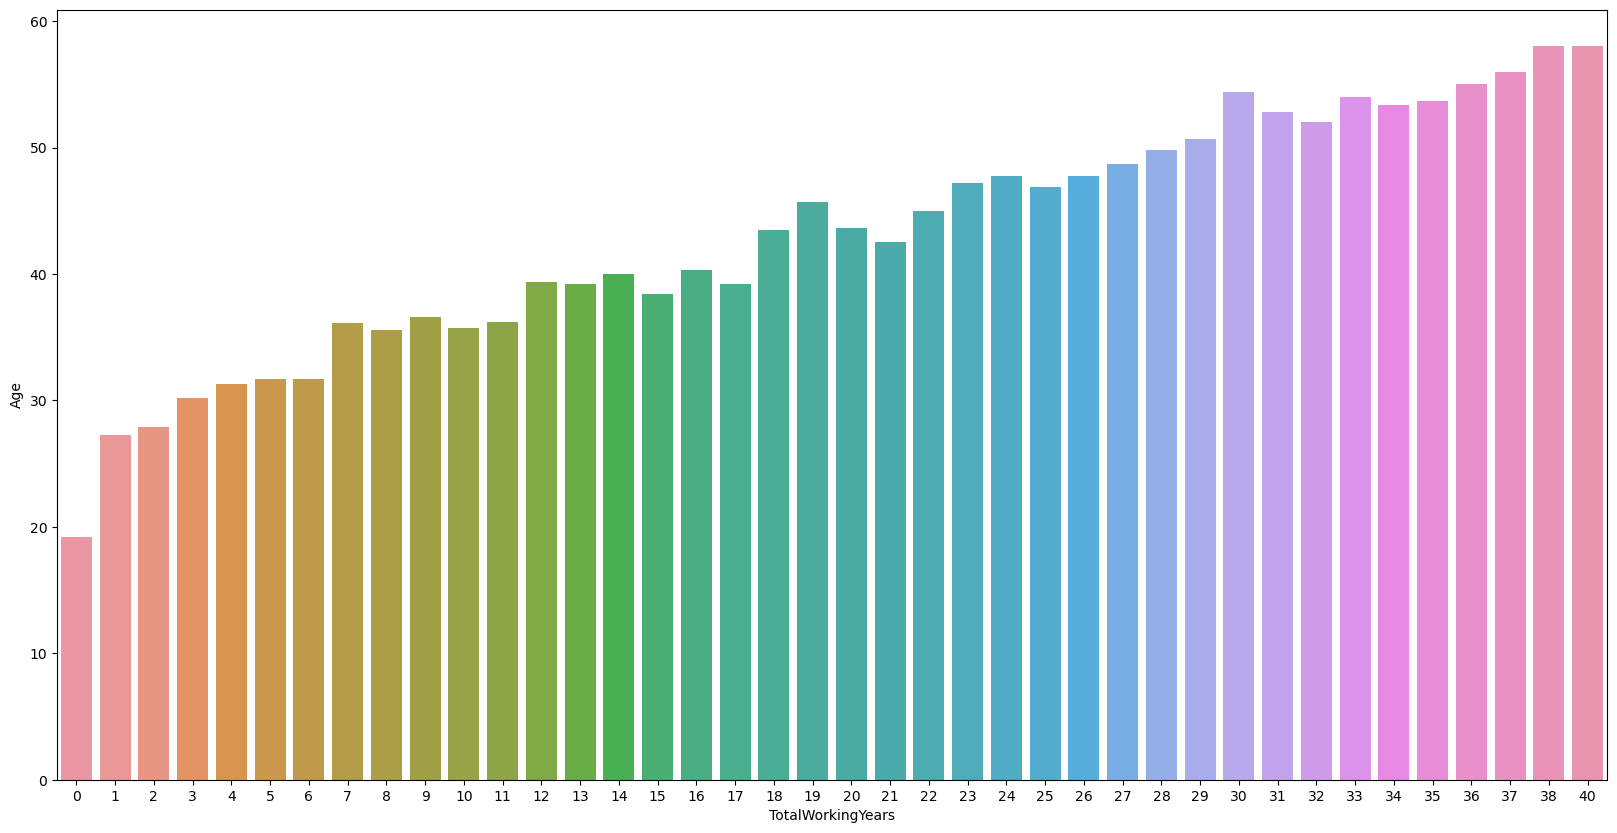

In [30]:
plt.figure(figsize=(20,10))
ax=sns.barplot(y='Age', x= 'TotalWorkingYears', data=df, ci=None)

Employees with 28 and 40 years of experience are 58 years of age.

Employees with less than 20 years of age are freshers.

Experience and age are positively correlated.

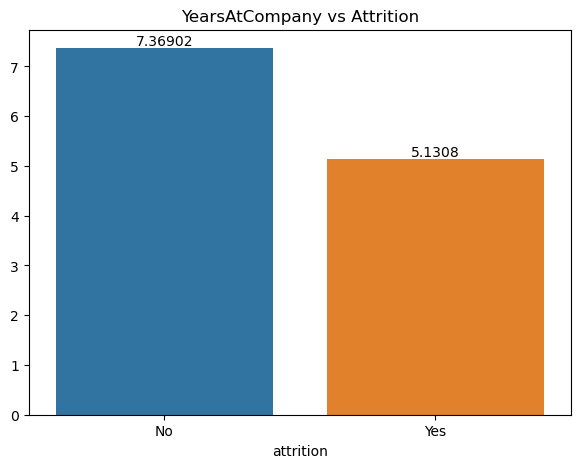

In [31]:
m=df.groupby('attrition')['YearsAtCompany'].mean()

plt.figure(figsize=(7,5))
ax=sns.barplot(x=m.index, y=m.values)
plt.bar_label(ax.containers[0])
plt.title("YearsAtCompany vs Attrition")
    
plt.show()

In [32]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

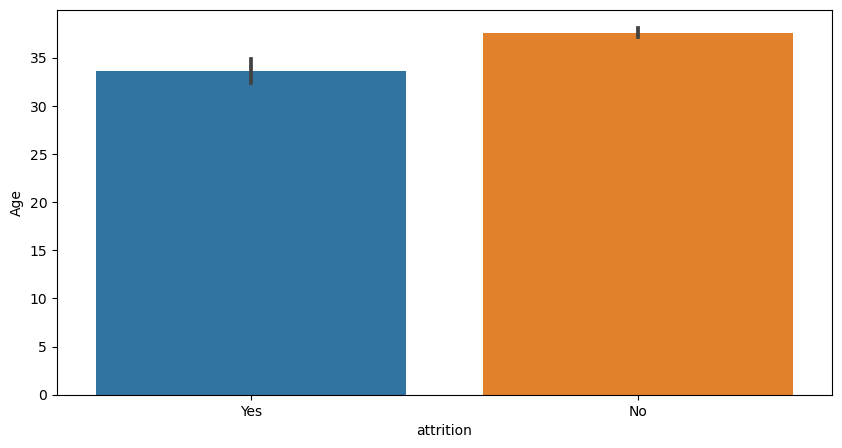

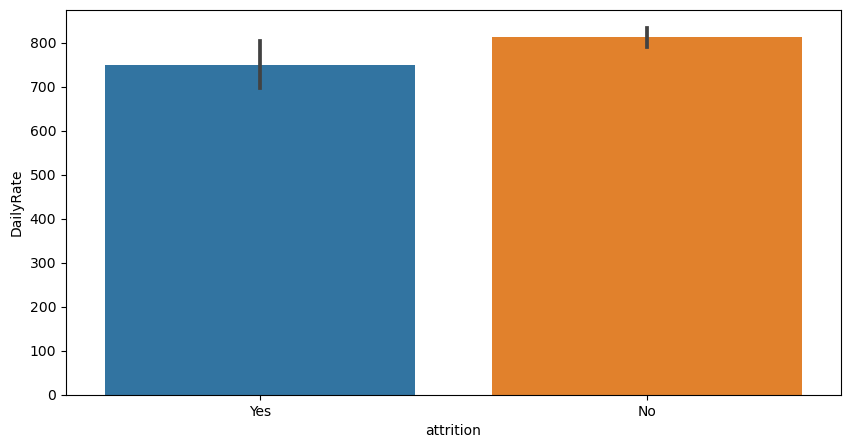

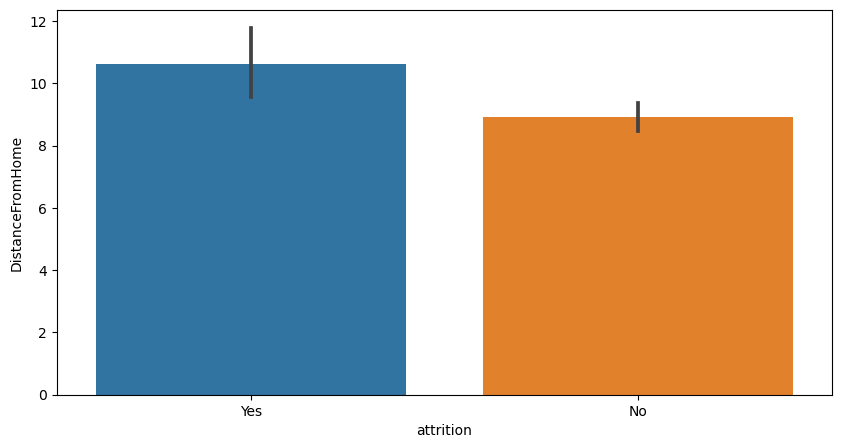

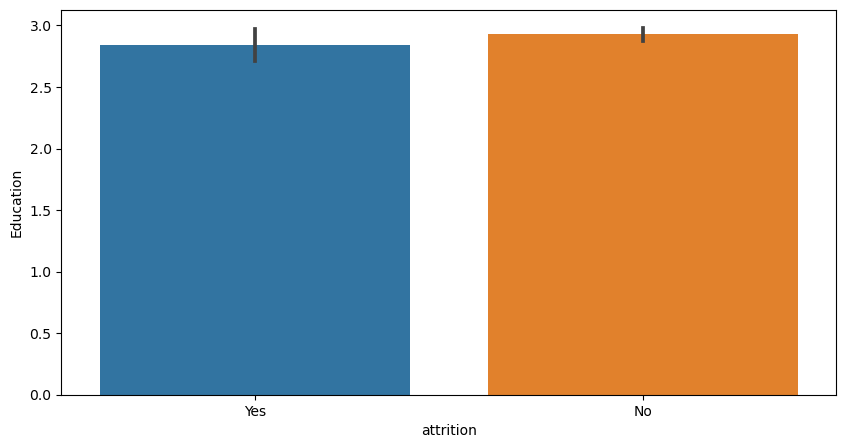

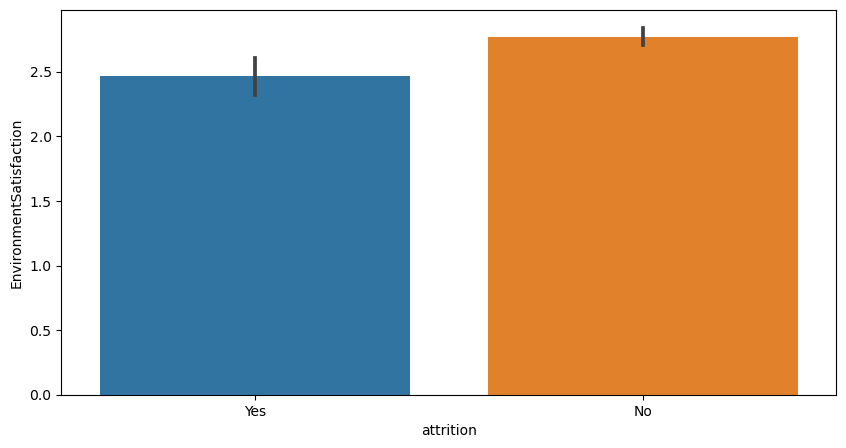

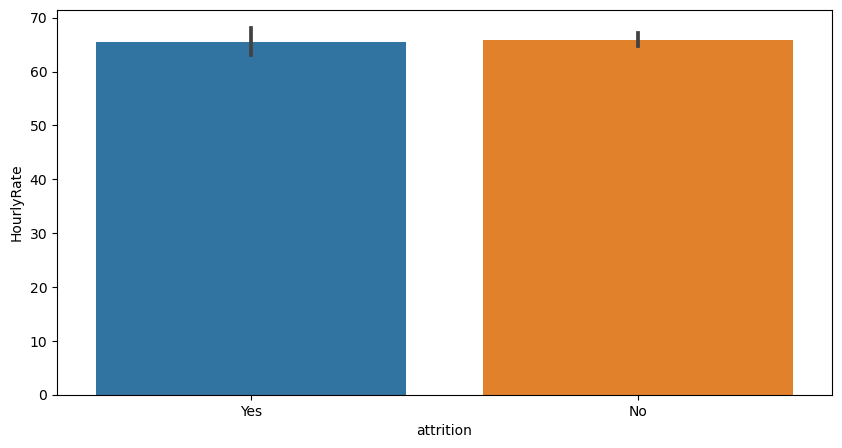

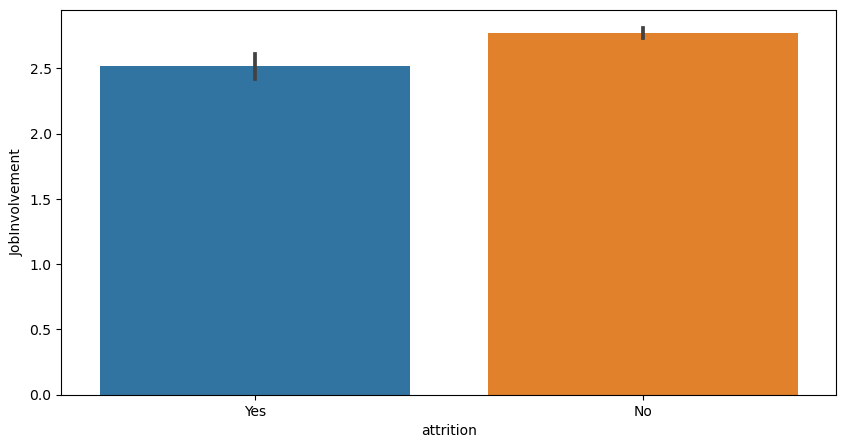

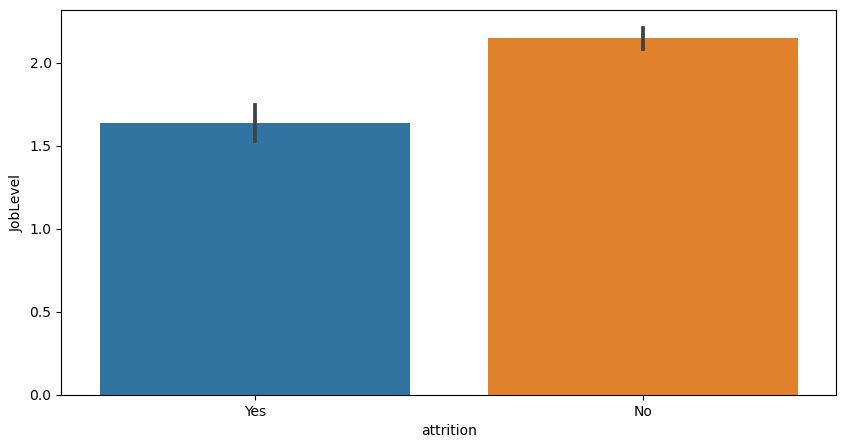

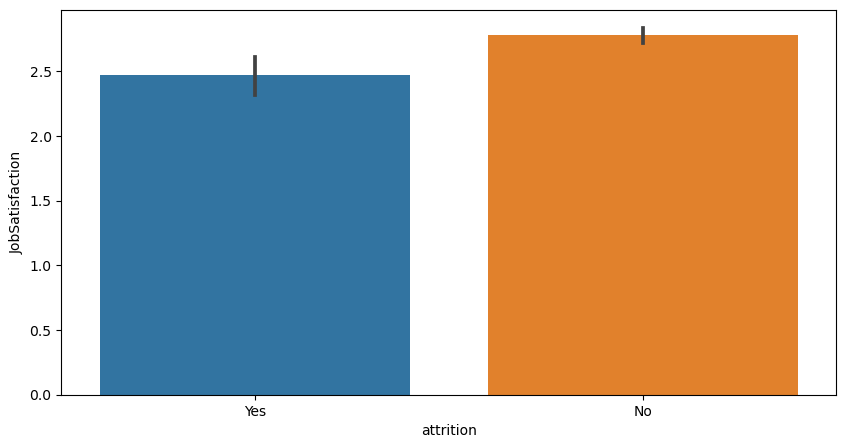

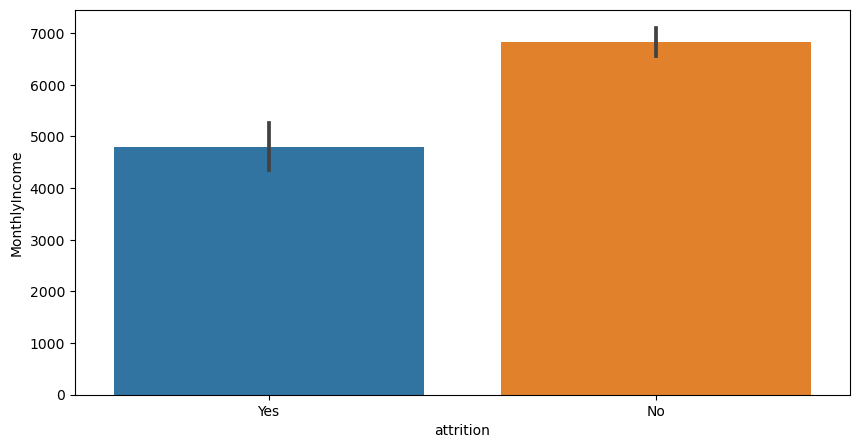

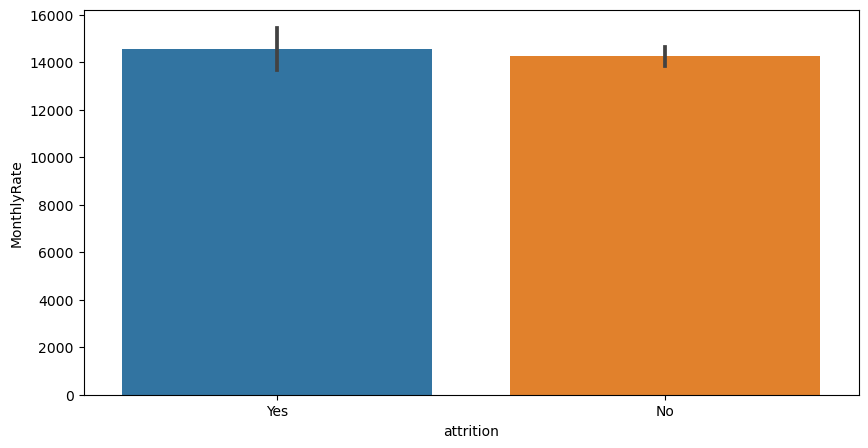

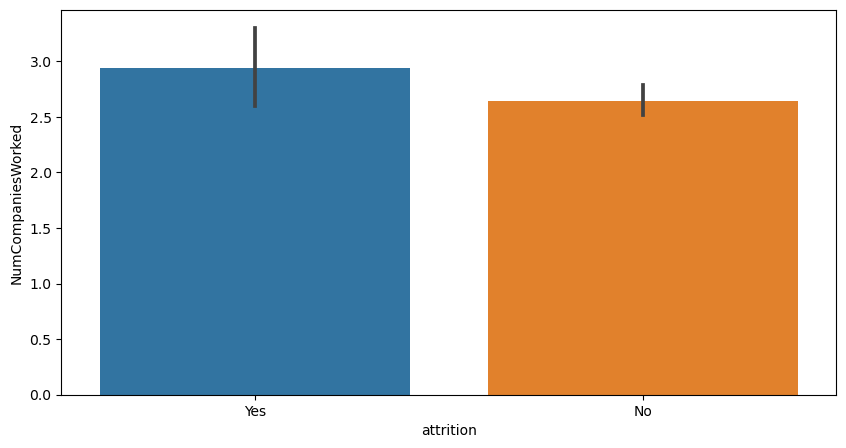

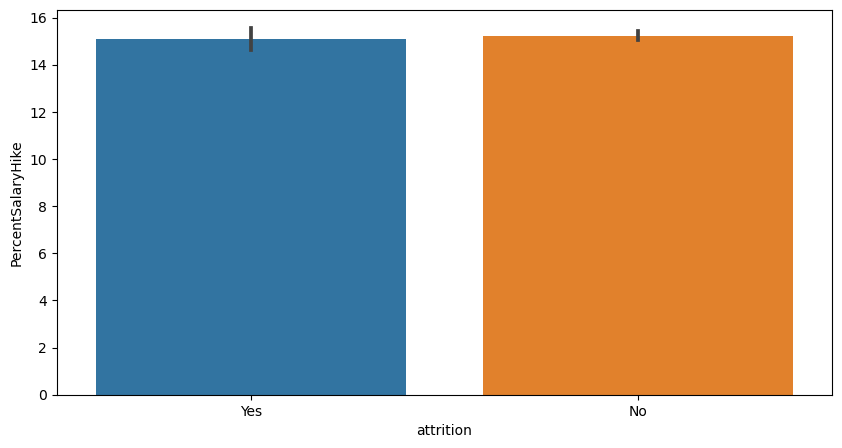

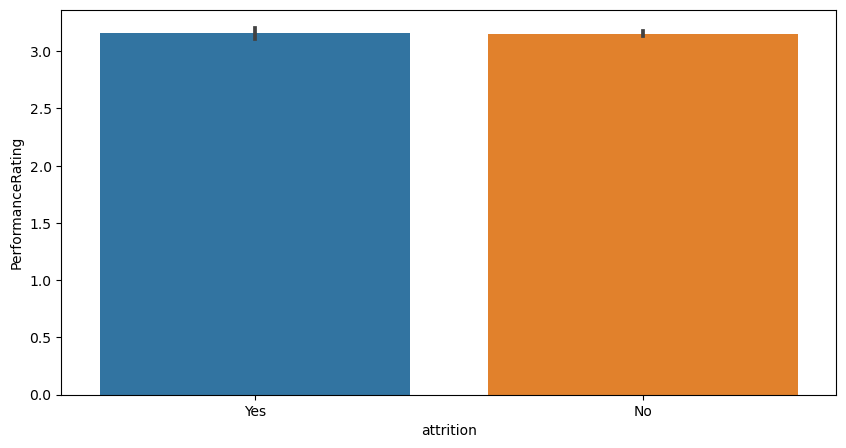

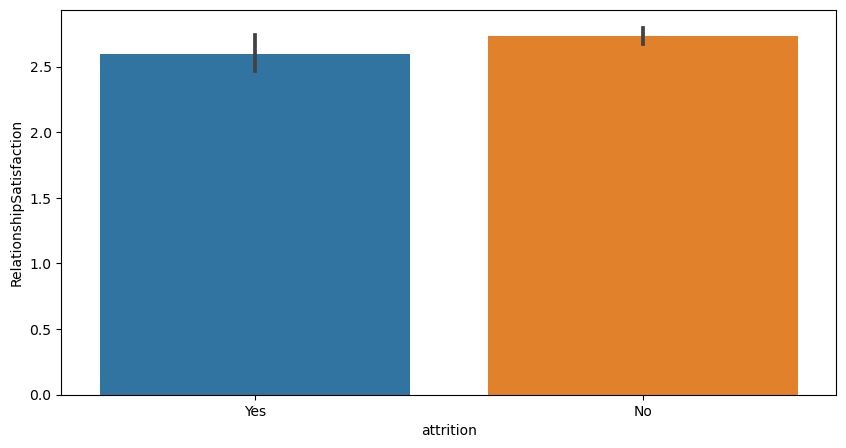

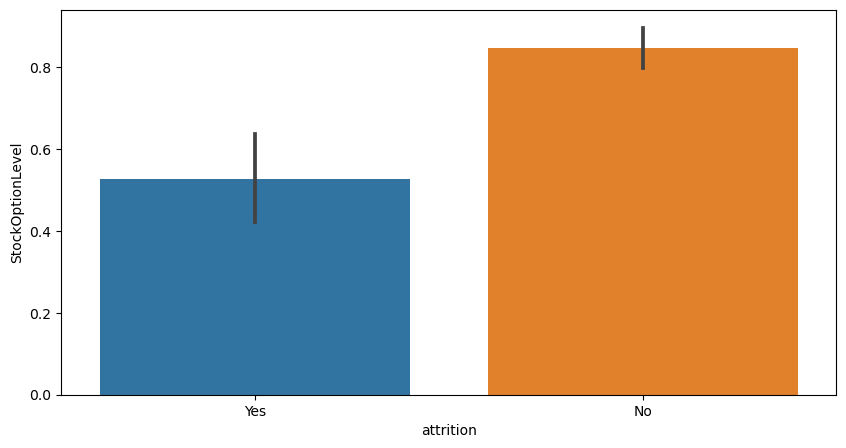

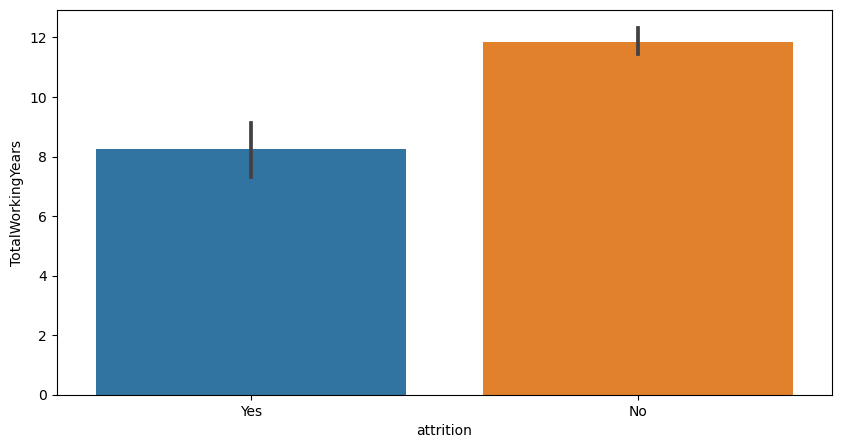

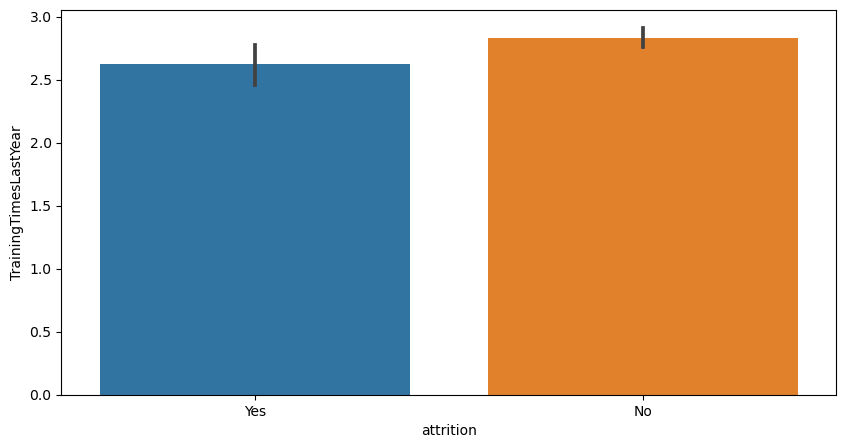

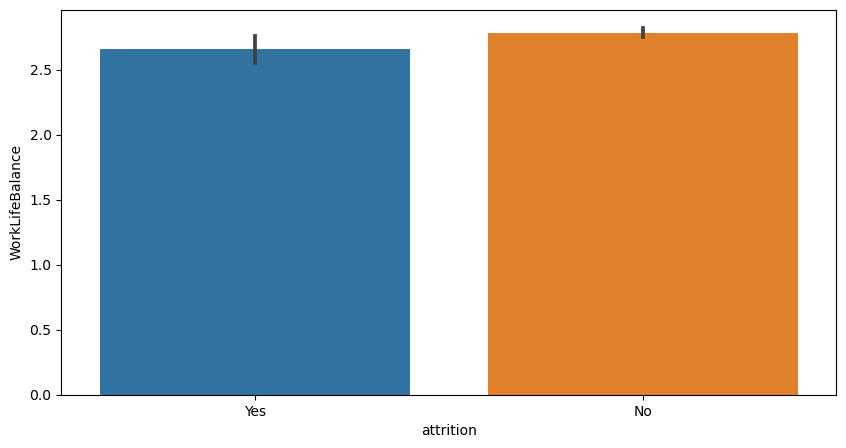

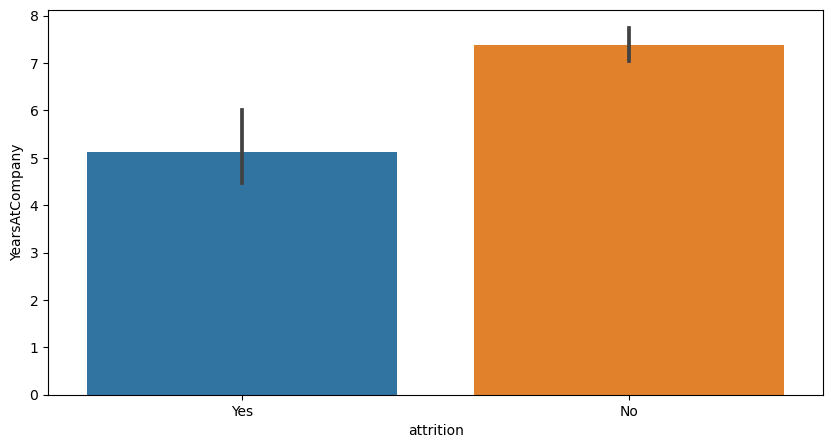

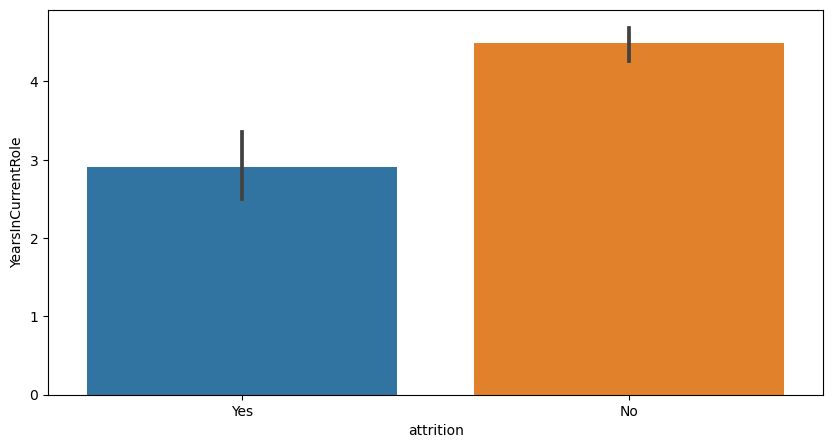

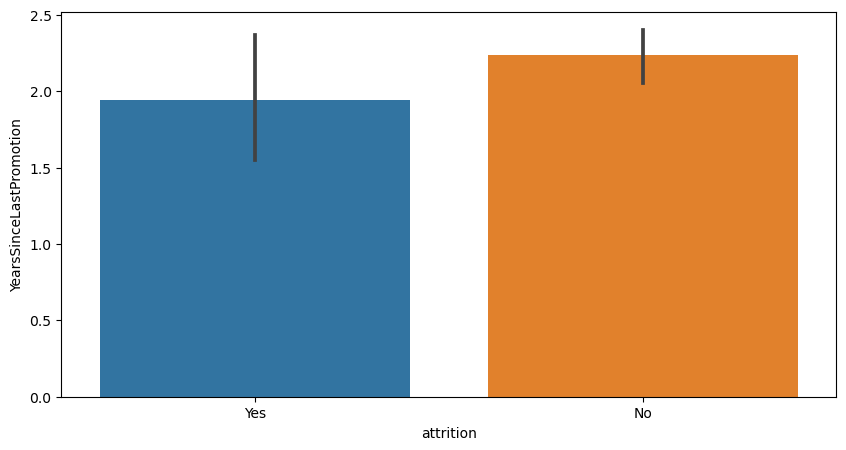

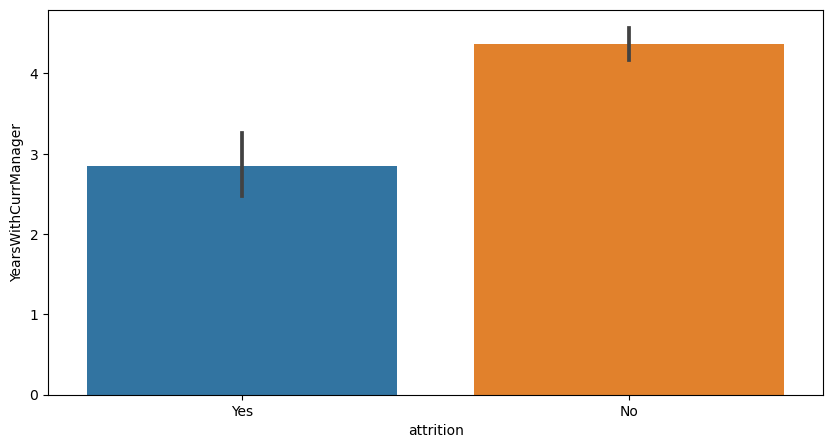

In [33]:
c=0
for i in con:
    plt.figure(figsize=(10,5))
    sns.barplot(y=df[i],x=df['attrition'])
    #plt.title("Scatterplot (" +j+ " vs "+i+")")
    c+=1

#### Separting columns

In [34]:
df.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
attrition 

In [35]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

From above we can say that all integer types except 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate' and 'PercentSalaryHike' are categories.
we need to perform skewness and outlier check on these 5 columns.

In [36]:
oper= ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

### Boxplot and outliers

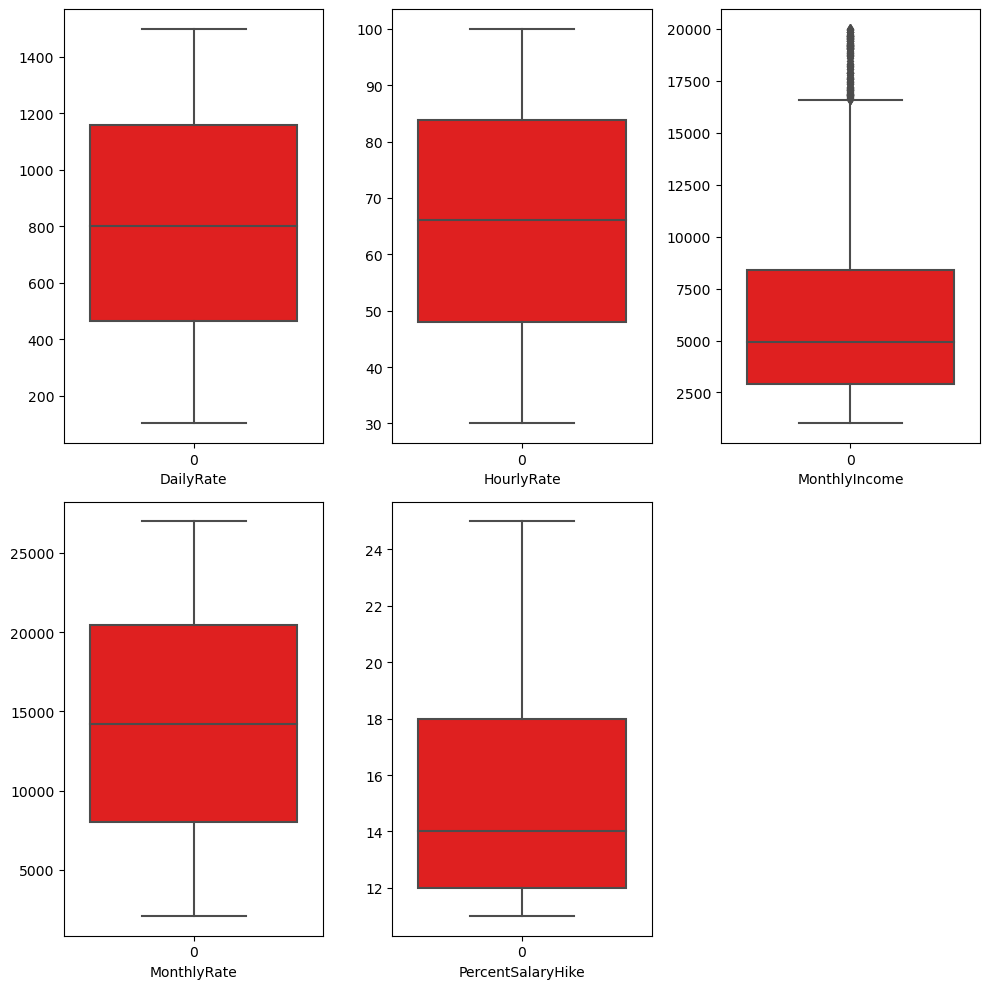

In [37]:
# Boxplot
plt.figure(figsize=(10,10))
c=1 
for i in oper:
    plt.subplot(2,3,c)
    sns.boxplot(df[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

There are outliers in the MonthlyIncome column.

In [38]:
# index of outliers by iqr
ind=[]
for i in oper:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    upper= df[i].quantile(0.75) + (IQR * 1.5)
    lower= df[i].quantile(0.25) - (IQR * 1.5)
    
    ind.append(df[df[i]>upper].index)
    ind.append(df[df[i]<lower].index)
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list.
len(set(no))

114

In [39]:
#zscore
from scipy.stats import zscore

z = zscore(df[oper])
t=np.abs(z)
# taking thresold value = 3

df2 = df[(t<3).all(axis = 1)]
df2.shape

(1470, 31)

In [40]:
l=df.shape[0]-df2.shape[0]
l

0

In [41]:
#Percentage of data loss
print("By IQR, the percent of data loss is {0}".format(len(set(no))/df.shape[0]*100))
print()
print("By z-score, the percent of data loss is {0}".format(l/df.shape[0]*100))

By IQR, the percent of data loss is 7.755102040816326

By z-score, the percent of data loss is 0.0


Using z-score for outlier removal we can see that there are no outliers.

In [42]:
# # Boxplot after z-score
# plt.figure(figsize=(10,20))
# c=1 
# for i in oper:
#     plt.subplot(8,3,c)
#     sns.boxplot(df2[i], orient='v', color= 'red')
#     plt.xlabel(i)
#     c+=1
    
# plt.tight_layout()

In [43]:
df.shape

(1470, 31)

#### Skewness

In [44]:
df[oper].skew()

DailyRate           -0.003519
HourlyRate          -0.032311
MonthlyIncome        1.369817
MonthlyRate          0.018578
PercentSalaryHike    0.821128
dtype: float64

from above we can see that only MonthlyIncome and PercentSalaryHike are highly skewed. we need to perform transformation on them.

In [45]:
# PowerTransformation

from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [46]:
df2=df.copy()

In [47]:
x_pw = pw.fit_transform(df[['MonthlyIncome', 'PercentSalaryHike']])
df3 = pd.DataFrame(x_pw, columns =['MonthlyIncome', 'PercentSalaryHike'])

In [48]:
df3

,MonthlyIncome,PercentSalaryHike
0,0.285965,-1.488918
1,0.052833,1.679689
2,-1.447625,0.201133
3,-0.863050,-1.488918
4,-0.567909,-0.948760
...,...,...
1465,-1.076843,0.719724
1466,1.002362,0.201133
1467,0.322118,1.281630
1468,0.127762,-0.121307


In [49]:
df3.skew()

MonthlyIncome        0.032831
PercentSalaryHike    0.116250
dtype: float64

In [50]:
df2[['MonthlyIncome', 'PercentSalaryHike']]=df3

In [51]:
df2[['MonthlyIncome', 'PercentSalaryHike']].skew()

MonthlyIncome        0.032831
PercentSalaryHike    0.116250
dtype: float64

skewness is reduced.

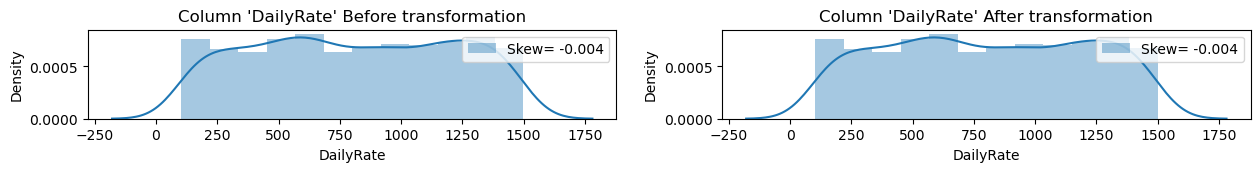

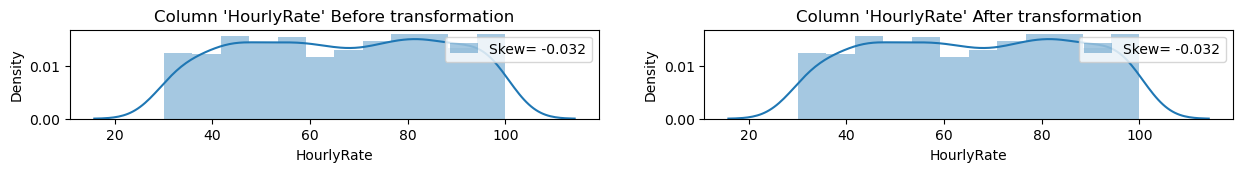

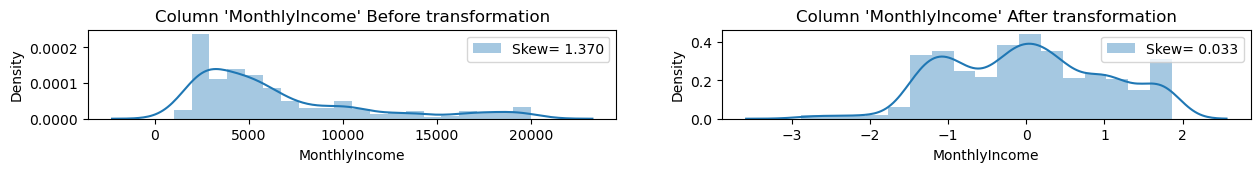

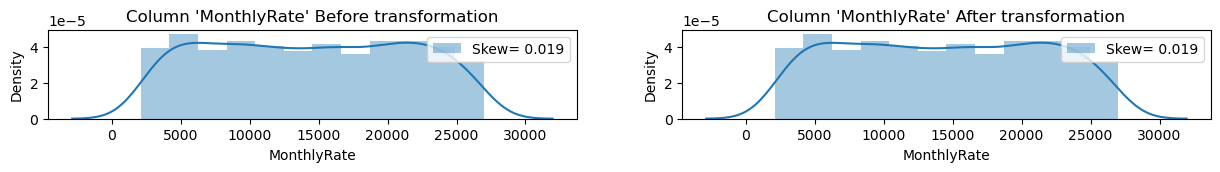

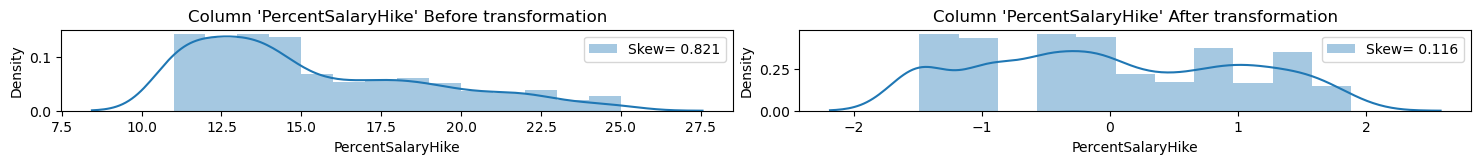

In [52]:
# Distribution plot and skewness
c=1
for i in df2[oper]:
    plt.figure(figsize=(15,22))
    
    plt.subplot(16,2,c)
    skew= df[i].skew()
    sns.distplot(df[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' Before transformation")
    
    plt.subplot(16,2,c+1)
    skew= df2[i].skew()
    sns.distplot(df2[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' After transformation")
    
    c+=2
    
plt.tight_layout()

#### Encoding

In [53]:
cat

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'attrition'],
      dtype='object')

In [54]:
for i in cat:
    print(i)
    print(df[i].unique())
    print()

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender
['Female' 'Male']

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus
['Single' 'Married' 'Divorced']

OverTime
['Yes' 'No']

attrition
['Yes' 'No']



In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    print("Encoding",i)
    df2[i]= le.fit_transform(df2[i])
    
print("Done")

Encoding BusinessTravel
Encoding Department
Encoding EducationField
Encoding Gender
Encoding JobRole
Encoding MaritalStatus
Encoding OverTime
Encoding attrition
Done


In [56]:
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,0.285965,19479,8,1,-1.488918,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,0.052833,24907,1,0,1.679689,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,-1.447625,2396,6,1,0.201133,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,-0.863050,23159,1,1,-1.488918,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,-0.567909,16632,9,0,-0.948760,3,4,1,6,3,3,2,2,2,2,0


#### Collinearity and multicollinearity

In [57]:
df2.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.487470,0.028051,0.299635,0.028062,0.004609,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.029114,-0.014107,0.020875,0.016543,-0.033243,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.000074
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.013106,-0.032182,0.038153,0.009135,0.023638,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.136079,0.023642,-0.035882,0.007481,-0.003053,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.063991
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,0.009866,0.027473,-0.029251,0.025514,0.037058,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.125187,-0.026084,0.126317,-0.020322,-0.001353,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.038811,-0.027182,-0.008663,0.002259,-0.009577,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.026846
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.017700,0.037600,0.012594,0.070132,-0.030118,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
Gender,-0.036311,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.046229,-0.041482,-0.039147,-0.041924,0.009383,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,0.029453
HourlyRate,0.024287,0.026528,0.023381,-0.004144,0.031131,0.016775,-0.021941,-0.049857,-0.000478,1.000000,0.042861,-0.027853,-0.018861,-0.071335,-0.017861,-0.017045,-0.015297,0.022157,-0.007782,-0.010511,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846


<AxesSubplot: >

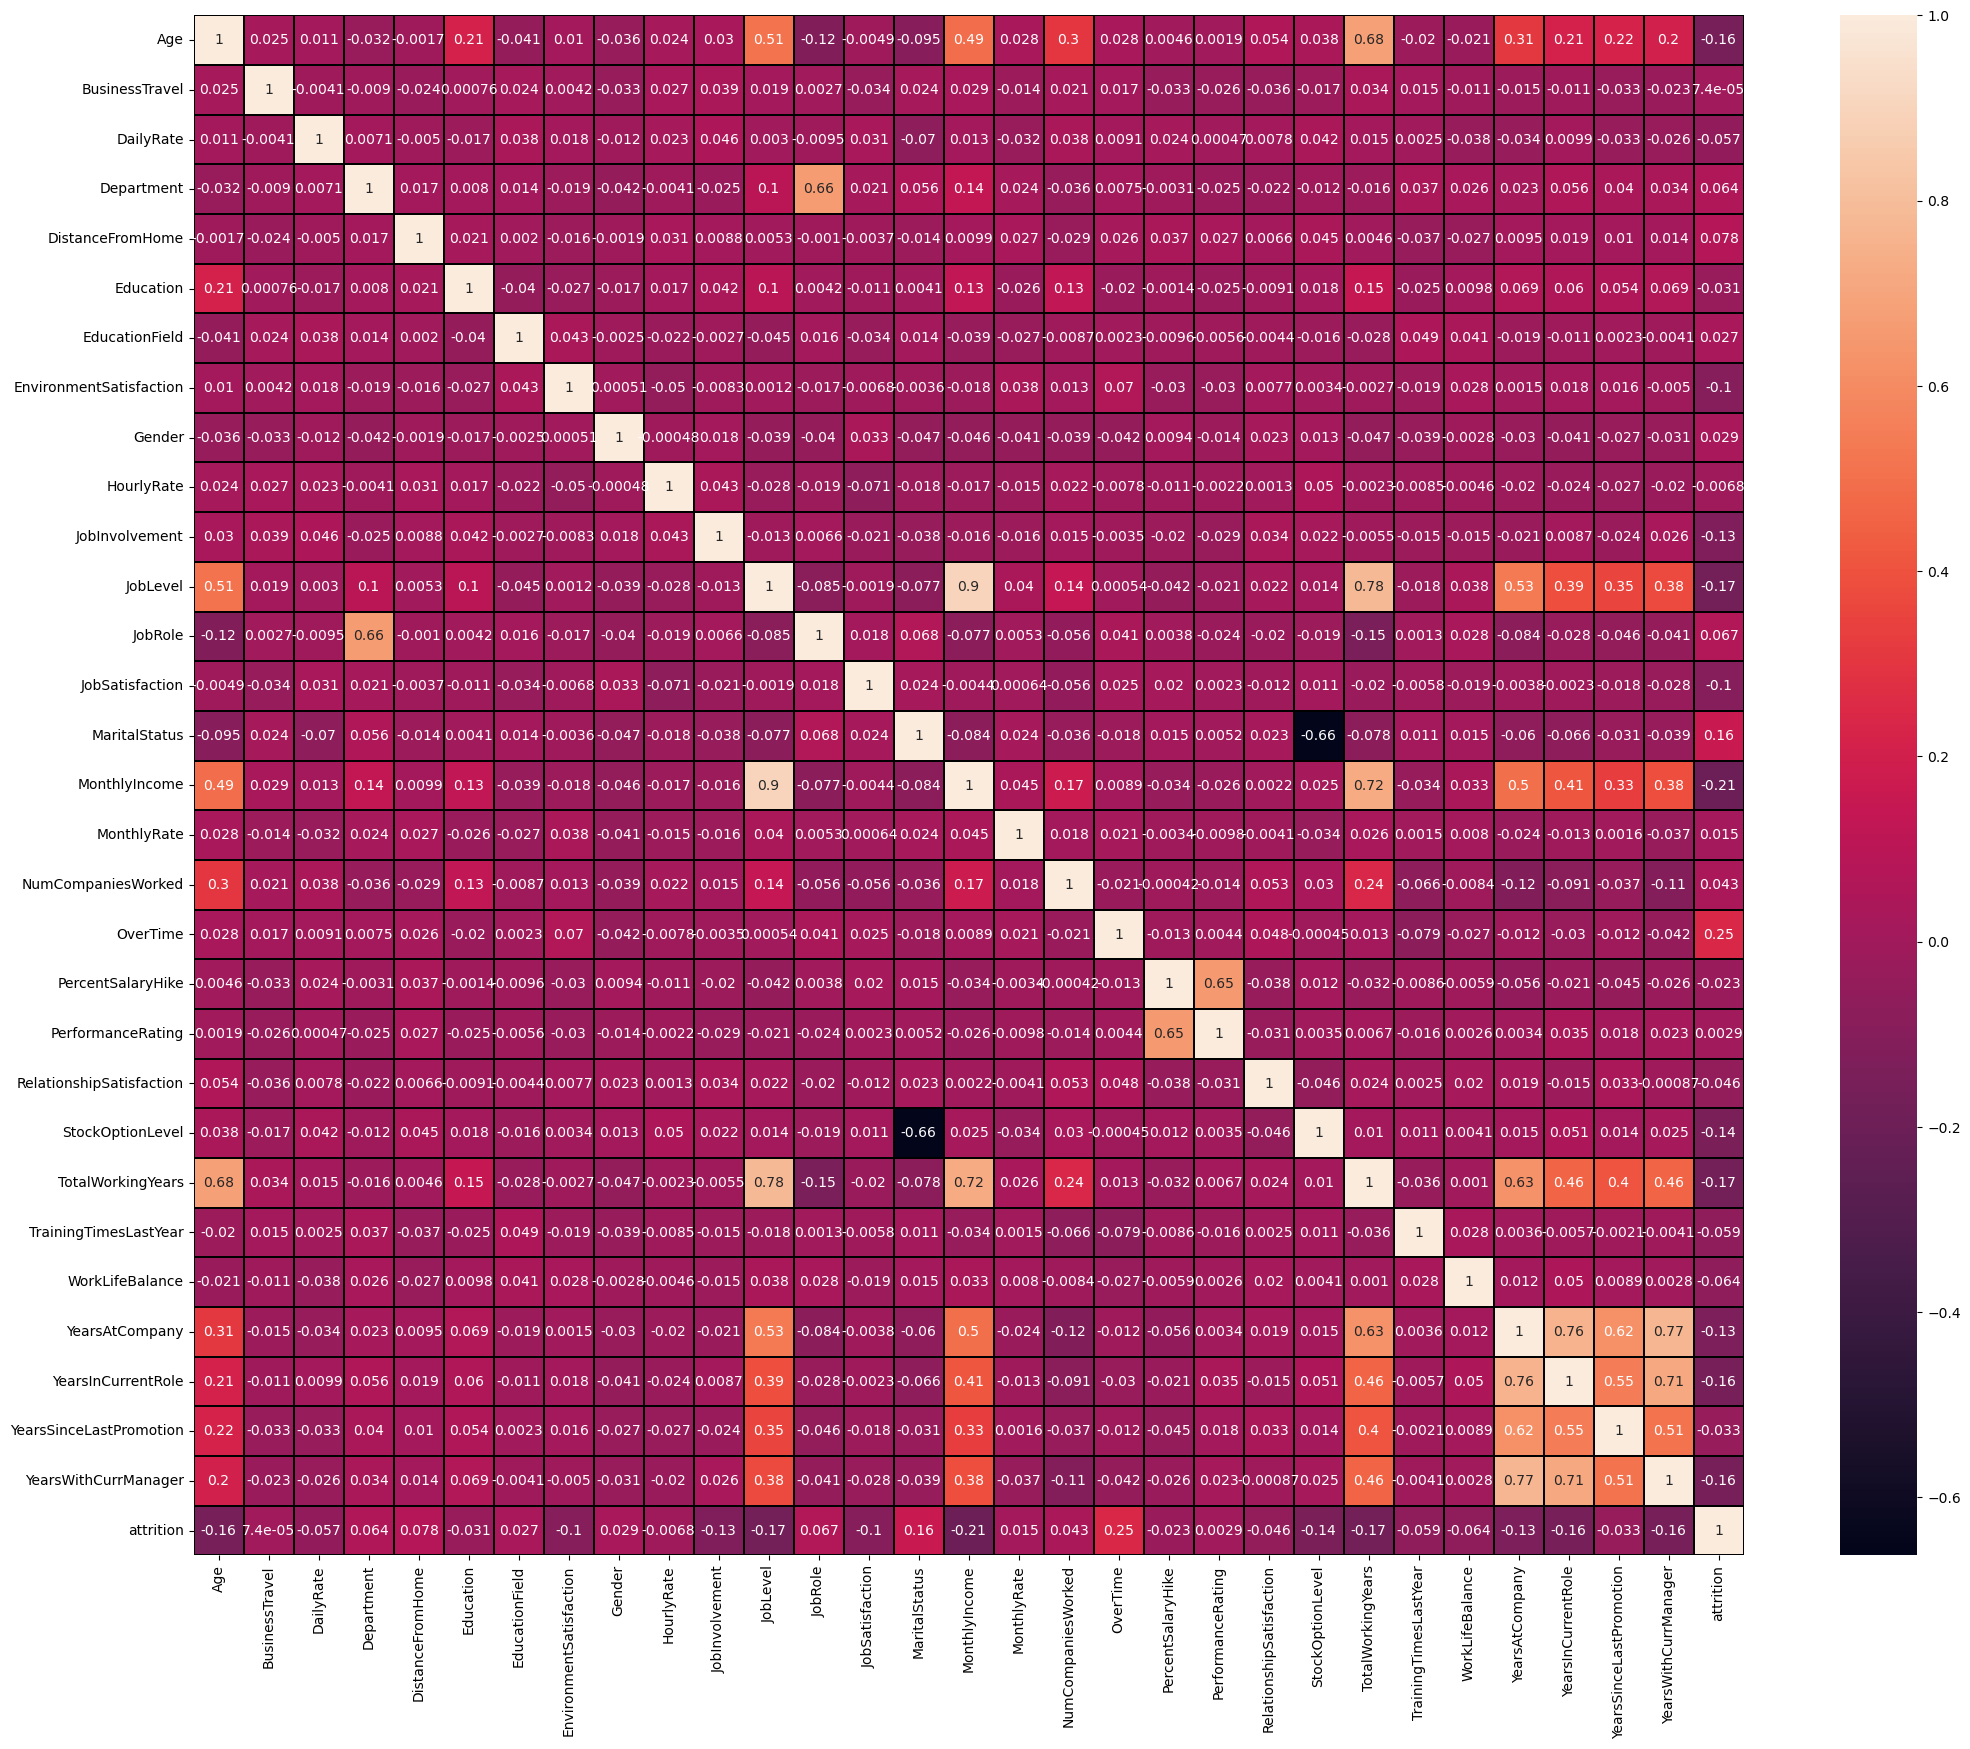

In [58]:
plt.figure(figsize=(25,20))
sns.heatmap(df2.corr(), annot=True, linewidth=0.2, linecolor='black')

None of the column has good correlation with target variable.

TotalWorkingYears is highly correlated to job level and monthly income. 

Year at company are highly correlated towards YearsinCurrentRole and YearsWithCurrentManager. 

In [59]:
df2.corr()['attrition']

Age                        -0.159205
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.205608
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.022524
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
Y

#### Splitting data into features and target variables

In [60]:
x= df2.drop("attrition", axis=1)
y=df2["attrition"]

print(x.shape, y.shape)

(1470, 30) (1470,)


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def vif_(x1):
    vif= pd.DataFrame()
    vif['Features']= x1.columns
    vif['VIF']= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    print(vif)

In [63]:
vif_(x)

                    Features        VIF
0                        Age  33.393070
1             BusinessTravel   6.782122
2                  DailyRate   4.982932
3                 Department  12.915552
4           DistanceFromHome   2.305147
5                  Education   9.474624
6             EducationField   3.875011
7    EnvironmentSatisfaction   7.195952
8                     Gender   2.513307
9                 HourlyRate  11.343429
10            JobInvolvement  15.357557
11                  JobLevel  28.776814
12                   JobRole   8.128108
13           JobSatisfaction   7.062478
14             MaritalStatus   5.831430
15             MonthlyIncome   5.358078
16               MonthlyRate   5.026196
17        NumCompaniesWorked   2.743910
18                  OverTime   1.435381
19         PercentSalaryHike   1.400864
20         PerformanceRating  68.541741
21  RelationshipSatisfaction   7.337530
22          StockOptionLevel   3.332062
23         TotalWorkingYears  14.352260


We got few columns with high VIF score. we need to delete highest ViF first and then check the VIF. We need to repeat the process till VIF of all columns are within range.

In [64]:
# dropping column 'PerformanceRating'
x= x.drop('PerformanceRating',axis=1)
vif_(x)

                    Features        VIF
0                        Age  31.696135
1             BusinessTravel   6.634187
2                  DailyRate   4.925171
3                 Department  12.800195
4           DistanceFromHome   2.295144
5                  Education   9.358669
6             EducationField   3.836796
7    EnvironmentSatisfaction   7.097141
8                     Gender   2.497359
9                 HourlyRate  10.895904
10            JobInvolvement  14.834581
11                  JobLevel  26.969467
12                   JobRole   8.128108
13           JobSatisfaction   6.892895
14             MaritalStatus   5.691165
15             MonthlyIncome   4.888050
16               MonthlyRate   4.944952
17        NumCompaniesWorked   2.738895
18                  OverTime   1.430940
19         PercentSalaryHike   1.013758
20  RelationshipSatisfaction   7.244785
21          StockOptionLevel   3.281337
22         TotalWorkingYears  14.212663
23     TrainingTimesLastYear   5.704808


In [65]:
# dropping column 'Total Volume'
x= x.drop('Age',axis=1)
vif_(x)

                    Features        VIF
0             BusinessTravel   6.601233
1                  DailyRate   4.917029
2                 Department  12.763618
3           DistanceFromHome   2.293889
4                  Education   8.938741
5             EducationField   3.834602
6    EnvironmentSatisfaction   7.038670
7                     Gender   2.493009
8                 HourlyRate  10.720197
9             JobInvolvement  14.532994
10                  JobLevel  26.829864
11                   JobRole   8.126149
12           JobSatisfaction   6.810687
13             MaritalStatus   5.685502
14             MonthlyIncome   4.844179
15               MonthlyRate   4.916552
16        NumCompaniesWorked   2.681490
17                  OverTime   1.427966
18         PercentSalaryHike   1.012033
19  RelationshipSatisfaction   7.152633
20          StockOptionLevel   3.267384
21         TotalWorkingYears  11.097559
22     TrainingTimesLastYear   5.660406
23           WorkLifeBalance  14.820150


In [66]:
# dropping column 'JobLevel'
x= x.drop('JobLevel',axis=1)
vif_(x)

                    Features        VIF
0             BusinessTravel   6.579853
1                  DailyRate   4.905368
2                 Department  12.698168
3           DistanceFromHome   2.291634
4                  Education   8.930904
5             EducationField   3.833373
6    EnvironmentSatisfaction   6.937712
7                     Gender   2.484013
8                 HourlyRate  10.662908
9             JobInvolvement  14.254291
10                   JobRole   8.123557
11           JobSatisfaction   6.740385
12             MaritalStatus   5.643967
13             MonthlyIncome   2.211234
14               MonthlyRate   4.891769
15        NumCompaniesWorked   2.669820
16                  OverTime   1.427695
17         PercentSalaryHike   1.011985
18  RelationshipSatisfaction   7.072861
19          StockOptionLevel   3.250234
20         TotalWorkingYears   9.194142
21     TrainingTimesLastYear   5.606405
22           WorkLifeBalance  14.397128
23            YearsAtCompany  10.503002


VIF is now in the range for every column

#### Oversampling using SMOTE

In [67]:
y.value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [70]:
x.shape, y.shape

((2466, 27), (2466,))

In [71]:
y.value_counts()

1    1233
0    1233
Name: attrition, dtype: int64

In [72]:
con

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Get dummies for better model performance

In [73]:
du=[]
for i in x:
    if df2[i].nunique()<10:
        du.append(i)

In [74]:
du

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [75]:
rem=[]
for i in x.columns:
    if (i not in du):
        rem.append(i)

In [76]:
x= pd.get_dummies(data = x, columns = du)
x.shape

(2466, 76)

In [77]:
x.head(5)

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2,Department_0,Department_1,Department_2,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_0,Gender_1,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,OverTime_0,OverTime_1,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,1102,1,94,0.285965,19479,8,-1.488918,8,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,279,8,61,0.052833,24907,1,1.679689,10,10,7,1,7,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1373,2,92,-1.447625,2396,6,0.201133,7,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1392,3,56,-0.863050,23159,1,-1.488918,8,8,7,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,591,2,40,-0.567909,16632,9,-0.948760,6,2,2,2,2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


#### Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x[rem] = scaler.fit_transform(x[rem])

In [86]:
x

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2,Department_0,Department_1,Department_2,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_0,Gender_1,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,OverTime_0,OverTime_1,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.852696,-1.129100,1.506657,0.500627,0.700662,2.265037,-1.559031,-0.251547,-0.005474,0.144532,-0.655120,0.488887,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,-1.258791,-0.210948,-0.243671,0.255497,1.460893,-0.697912,1.786613,0.024947,0.686818,1.043815,-0.314148,1.103204,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1.547974,-0.997936,1.400577,-1.322187,-1.691935,1.418480,0.225447,-0.389795,-1.043912,-1.054512,-0.655120,-1.046904,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1.596720,-0.866771,-0.508872,-0.707525,1.216073,-0.697912,-1.559031,-0.251547,0.340672,1.043815,0.367796,-1.046904,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.458325,-0.997936,-1.357516,-0.397194,0.301919,2.688315,-0.988692,-0.528042,-0.697766,-0.454990,0.026824,-0.432587,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.973280,-0.342113,-0.296711,-0.769474,1.061450,-0.274633,0.033312,-0.528042,-0.178547,-0.155229,-0.655120,0.181729,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2462,-0.412144,-1.129100,1.718818,-0.920972,0.913829,-1.121190,1.398036,-1.081031,-1.043912,-1.054512,-0.655120,-1.046904,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2463,-0.950920,1.231862,-0.508872,-0.388704,1.173215,-0.697912,-1.046972,-0.251547,-0.005474,0.444293,-0.655120,-1.046904,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2464,-0.319782,-0.079784,1.029295,-1.308382,1.029376,-0.274633,-0.039056,0.439689,-0.351620,-0.155229,-0.655120,-1.046904,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


#### Model

In [256]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [257]:
mdl, acc, rs, tr, cvsc= [],[],[],[],[]

# function to get best random_state
def prediction(model, ran):
    acc=0
    rs=0
    
    for i in range (ran):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i)
            
        model.fit(x_train, y_train)     #train model
        y_tr= model.predict(x_train)    #prediction on train
        y_pred=model.predict(x_test)    #prediction on test
        
        pred_tr= accuracy_score(y_train, y_tr)    #R2 score of train
        pred_test= accuracy_score(y_test,y_pred)       #R2 score of test
    
    #sort randomstate at which train and test score difference is 1.
        margin=np.abs(round(pred_tr*100)-round(pred_test*100))
            
        if ((margin<=2) and (round(pred_test*100)>=75)):   
            print("at random state", i)
            print("Accuracy of train is ",pred_tr*100)
            print("Accuracy of test is ",pred_test*100)
            print("-x"*20)
            print()            
    
    print("Best Random_states sorted.")

    
# function to get score at the best random_state
def final(model, best_rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=best_rs)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test
    
    pred_tr= accuracy_score(y_train, y_tr)    # score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test
    
    print("at random state", best_rs)
    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
          
    #saving the data
    tr.append(pred_tr)
    acc.append(pred_test)
    rs.append(best_rs)
    


def cv_score(model, x, y):    # cross val score of the model
    cvsco=0
    for val in range(2,15):
        cv = cross_val_score(model, x, y, cv = val).mean()
        print('cross_val_score', cv*100,'at cv =', val)
        if cvsco<cv*100:
            cvsco=cv*100
    cvsc.append(cvsco)        
    
        

#### LogisticRegression

In [258]:
lr= LogisticRegression()
prediction(lr, 100)

at random state 2
Accuracy of train is  88.42617631151974
Accuracy of test is  86.22366288492707
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 3
Accuracy of train is  88.42617631151974
Accuracy of test is  86.87196110210697
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  88.37209302325581
Accuracy of test is  86.06158833063209
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 8
Accuracy of train is  87.56084369929692
Accuracy of test is  87.19611021069692
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  87.61492698756085
Accuracy of test is  89.3030794165316
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 10
Accuracy of train is  87.99351000540833
Accuracy of test is  87.03403565640194
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 12
Accuracy of train is  87.7230935640887
Accuracy of test is  85.89951377633712
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 14
Accuracy

at random state 79
Accuracy of train is  88.10167658193619
Accuracy of test is  86.87196110210697
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 80
Accuracy of train is  88.04759329367225
Accuracy of test is  85.89951377633712
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 81
Accuracy of train is  87.61492698756085
Accuracy of test is  87.19611021069692
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 82
Accuracy of train is  88.26392644672796
Accuracy of test is  86.22366288492707
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 84
Accuracy of train is  88.15575987020011
Accuracy of test is  86.22366288492707
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 85
Accuracy of train is  87.99351000540833
Accuracy of test is  87.52025931928688
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 86
Accuracy of train is  87.39859383450514
Accuracy of test is  88.97893030794165
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 89
A

Best accuracy is at random_state 39

In [259]:
#final metrics
final(lr,39)
mdl.append("LogisticRegression")

at random state 39
Accuracy of train is  88.04759329367225
Accuracy of test is  88.16855753646678

Confusion Matrix
[[297  31]
 [ 42 247]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       328
           1       0.89      0.85      0.87       289

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



In [260]:
cv_score(lr,x,y)

cross_val_score 82.60340632603406 at cv = 2
cross_val_score 84.10381184103812 at cv = 3
cross_val_score 83.98566587383444 at cv = 4
cross_val_score 84.0307626610605 at cv = 5
cross_val_score 84.91484184914842 at cv = 6
cross_val_score 85.5303336889739 at cv = 7
cross_val_score 85.7339868868995 at cv = 8
cross_val_score 86.29359286293592 at cv = 9
cross_val_score 85.9734702610184 at cv = 10
cross_val_score 85.94011544011543 at cv = 11
cross_val_score 86.09696897939855 at cv = 12
cross_val_score 86.33978107662318 at cv = 13
cross_val_score 86.46567062880621 at cv = 14


#### DecisionTreeClassifier

In [261]:
dt=DecisionTreeClassifier()
prediction(dt,200)

Best Random_states sorted.


DecisionTree is not feasible.
In such case we will go with any random state and check the metrics.

In [262]:
#final metrics
final(dt,39)
mdl.append("DecisionTreeClassifier")

at random state 39
Accuracy of train is  100.0
Accuracy of test is  77.47163695299838

Confusion Matrix
[[254  74]
 [ 65 224]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       328
           1       0.75      0.78      0.76       289

    accuracy                           0.77       617
   macro avg       0.77      0.77      0.77       617
weighted avg       0.78      0.77      0.77       617



In [263]:
cv_score(dt,x,y)

cross_val_score 76.19626926196268 at cv = 2
cross_val_score 78.83211678832117 at cv = 3
cross_val_score 78.91563966827339 at cv = 4
cross_val_score 78.55252892724869 at cv = 5
cross_val_score 80.41362530413626 at cv = 6
cross_val_score 79.28470254957506 at cv = 7
cross_val_score 80.50214348758038 at cv = 8
cross_val_score 79.52149229521493 at cv = 9
cross_val_score 78.5538659030315 at cv = 10
cross_val_score 79.61525974025975 at cv = 11
cross_val_score 79.6116504854369 at cv = 12
cross_val_score 80.17886596833965 at cv = 13
cross_val_score 80.09919106317413 at cv = 14


#### RandomForestClassifier

In [264]:
rf=RandomForestClassifier()
prediction(rf,100)

Best Random_states sorted.


RandomForest is also not feasible

In [265]:
#final metrics
final(rf,39)
mdl.append("RandomForestClassifier")

at random state 39
Accuracy of train is  100.0
Accuracy of test is  88.49270664505673

Confusion Matrix
[[296  32]
 [ 39 250]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       328
           1       0.89      0.87      0.88       289

    accuracy                           0.88       617
   macro avg       0.89      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



In [266]:
cv_score(rf,x,y)

cross_val_score 86.69910786699107 at cv = 2
cross_val_score 87.42903487429035 at cv = 3
cross_val_score 88.40574943694878 at cv = 4
cross_val_score 89.09962142053527 at cv = 5
cross_val_score 89.45660989456609 at cv = 6
cross_val_score 89.62843990287332 at cv = 7
cross_val_score 90.15716282099777 at cv = 8
cross_val_score 89.65936739659368 at cv = 9
cross_val_score 89.46561995984332 at cv = 10
cross_val_score 90.20111832611832 at cv = 11
cross_val_score 89.91416054937248 at cv = 12
cross_val_score 89.79028768502454 at cv = 13
cross_val_score 90.28129356519187 at cv = 14


#### SVC

In [267]:
svc = SVC()
prediction(svc,100)

Best Random_states sorted.


In [268]:
#final metrics on any random_state
final(svc,173)
mdl.append("SVC")

at random state 173
Accuracy of train is  96.1060032449973
Accuracy of test is  92.38249594813614

Confusion Matrix
[[284  22]
 [ 25 286]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       306
           1       0.93      0.92      0.92       311

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [269]:
cv_score(svc,x,y)

cross_val_score 86.09083536090836 at cv = 2
cross_val_score 87.06407137064072 at cv = 3
cross_val_score 87.2708986718306 at cv = 4
cross_val_score 87.8434109927651 at cv = 5
cross_val_score 88.72668288726683 at cv = 6
cross_val_score 89.09980777013354 at cv = 7
cross_val_score 89.34494914470643 at cv = 8
cross_val_score 89.213300892133 at cv = 9
cross_val_score 89.3412000921629 at cv = 10
cross_val_score 89.43073593073592 at cv = 11
cross_val_score 89.38531060067884 at cv = 12
cross_val_score 89.42205942205942 at cv = 13
cross_val_score 89.75415474356151 at cv = 14


#### KNeighborsClassifier

In [270]:
knn= KNeighborsClassifier()
prediction(knn,200)

at random state 26
Accuracy of train is  90.3731746890211
Accuracy of test is  87.68233387358185
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 67
Accuracy of train is  90.42725797728501
Accuracy of test is  87.68233387358185
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 70
Accuracy of train is  90.21092482422931
Accuracy of test is  88.16855753646678
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 74
Accuracy of train is  90.42725797728501
Accuracy of test is  87.84440842787681
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 165
Accuracy of train is  90.04867495943753
Accuracy of test is  87.68233387358185
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 173
Accuracy of train is  90.48134126554895
Accuracy of test is  88.6547811993517
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Best Random_states sorted.


In [271]:
#final metrics on any random_state
final(knn,173)
mdl.append("KNeighborsClassifier")

at random state 173
Accuracy of train is  90.48134126554895
Accuracy of test is  88.6547811993517

Confusion Matrix
[[244  62]
 [  8 303]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       306
           1       0.83      0.97      0.90       311

    accuracy                           0.89       617
   macro avg       0.90      0.89      0.89       617
weighted avg       0.90      0.89      0.89       617



In [272]:
cv_score(knn,x,y)

cross_val_score 82.56285482562855 at cv = 2
cross_val_score 85.60421735604217 at cv = 3
cross_val_score 85.44157422804099 at cv = 4
cross_val_score 86.25345936224554 at cv = 5
cross_val_score 85.80697485806975 at cv = 6
cross_val_score 86.13208675177513 at cv = 7
cross_val_score 85.9295538603791 at cv = 8
cross_val_score 85.88807785888079 at cv = 9
cross_val_score 86.00918337118596 at cv = 10
cross_val_score 85.68650793650794 at cv = 11
cross_val_score 85.44281316599574 at cv = 12
cross_val_score 85.56455240665765 at cv = 13
cross_val_score 86.01121689045421 at cv = 14


#### GaussianNB

In [273]:
gnb= GaussianNB()
prediction(gnb,100)

at random state 0
Accuracy of train is  80.69226608977826
Accuracy of test is  79.09238249594813
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 1
Accuracy of train is  81.07084910762575
Accuracy of test is  79.09238249594813
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  80.04326663061114
Accuracy of test is  82.17179902755267
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 3
Accuracy of train is  80.90859924283397
Accuracy of test is  80.71312803889789
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  80.47593293672254
Accuracy of test is  79.09238249594813
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  80.47593293672254
Accuracy of test is  82.33387358184766
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  81.07084910762575
Accuracy of test is  80.71312803889789
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 10
Accuracy

at random state 86
Accuracy of train is  79.71876690102758
Accuracy of test is  82.49594813614263
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 87
Accuracy of train is  81.12493239588967
Accuracy of test is  78.6061588330632
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 88
Accuracy of train is  80.53001622498648
Accuracy of test is  78.7682333873582
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 89
Accuracy of train is  79.66468361276365
Accuracy of test is  79.4165316045381
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 90
Accuracy of train is  80.36776636019471
Accuracy of test is  81.84764991896273
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 91
Accuracy of train is  80.31368307193077
Accuracy of test is  81.03727714748784
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 92
Accuracy of train is  79.71876690102758
Accuracy of test is  79.09238249594813
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 93
Accu

Best accuracy is at random_state 84

In [274]:
final(gnb,84)
mdl.append("GaussianNB")

at random state 84
Accuracy of train is  80.9626825310979
Accuracy of test is  81.19935170178282

Confusion Matrix
[[229  82]
 [ 34 272]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       311
           1       0.77      0.89      0.82       306

    accuracy                           0.81       617
   macro avg       0.82      0.81      0.81       617
weighted avg       0.82      0.81      0.81       617



In [275]:
cv_score(gnb,x,y)

cross_val_score 75.87185725871856 at cv = 2
cross_val_score 76.1962692619627 at cv = 3
cross_val_score 77.45848155086405 at cv = 4
cross_val_score 78.59785991738592 at cv = 5
cross_val_score 78.95377128953771 at cv = 6
cross_val_score 79.2062929987859 at cv = 7
cross_val_score 79.4922613793973 at cv = 8
cross_val_score 79.27818329278183 at cv = 9
cross_val_score 79.32688193278695 at cv = 10
cross_val_score 79.45670995670994 at cv = 11
cross_val_score 79.61441313442262 at cv = 12
cross_val_score 79.57007904376324 at cv = 13
cross_val_score 79.66078765866902 at cv = 14


#### Model Summary

In [276]:
pd.DataFrame({"Model name": mdl, "Random_state":rs, "Train_Accuracy": tr, "Test_Accuracy": acc, "CV_score": cvsc})

,Model name,Random_state,Train_Accuracy,Test_Accuracy,CV_score
0,LogisticRegression,39,0.880476,0.881686,86.465671
1,DecisionTreeClassifier,39,1.000000,0.774716,80.502143
2,RandomForestClassifier,39,1.000000,0.884927,90.281294
3,SVC,173,0.961060,0.923825,89.754155
4,KNeighborsClassifier,173,0.904813,0.886548,86.253459
5,GaussianNB,84,0.809627,0.811994,79.660788


From the above data, we can see that LogisticRegression have better metrics.

#### Hyperparameter Tunning

In [294]:
global y_test, y_pred
def tuned (model):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=39)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test

    pred_tr= accuracy_score(y_train, y_tr)    #score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test

    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))

In [277]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [278]:
param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
            'multi_class' : ['auto', 'ovr', 'multinomial'],
             'tol': [.0001, .0002, .0003, .0004]}

grid = GridSearchCV(lr, param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.0002, 0.0003, 0.0004]})

In [279]:
# getting best parameters
grid.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

In [280]:
lrht=LogisticRegression(multi_class='auto',  penalty = 'l2', solver = 'liblinear',tol= 0.0001, n_jobs=2)

In [290]:
tuned(lrht)

Accuracy of train is  87.9394267171444
Accuracy of test is  88.16855753646678

Confusion Matrix
[[297  31]
 [ 42 247]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       328
           1       0.89      0.85      0.87       289

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



Even after Hyper_tunning, the accuracy is almost same.

we will stick with LogisticRegression before tunning.

In [291]:
#LogisticRegressor
tuned(lr)

Accuracy of train is  88.04759329367225
Accuracy of test is  88.16855753646678

Confusion Matrix
[[297  31]
 [ 42 247]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       328
           1       0.89      0.85      0.87       289

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



#### AUC-ROC Curve

In [297]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [298]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

print("Threshold", threshold)
print("FPR", fpr)
print("TPR", tpr)

Threshold [2 1 0]
FPR [0.        0.0945122 1.       ]
TPR [0.         0.85467128 1.        ]


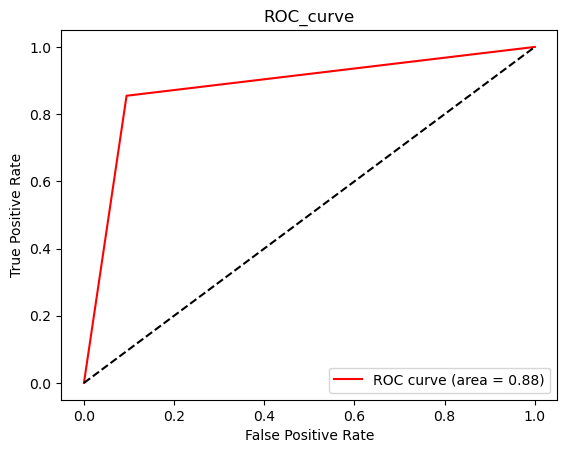

In [303]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,color='Red', label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="Black", linestyle="--")
plt.title("ROC_curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

plt.show()

#### Saving model

In [307]:
import pickle

#saving model
pickle.dump(lr, open('HR_analys.pkl', 'wb'))

In [308]:
#Load model
file= pickle.load(open('HR_analys.pkl', 'rb'))

In [315]:
file.predict(x_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

#### Conclusion

In [316]:
pd.set_option('display.max_rows', None)

In [319]:
end= pd.DataFrame({"y_test actual": y_test, "Predicted output": y_pred, "Predicted output pickle": file.predict(x_test),
             "Correct Prediction?": y_test==y_pred})
end.shape

(617, 4)

In [320]:
end

,y_test actual,Predicted output,Predicted output pickle,Correct Prediction?
668,0,0,0,True
1189,0,0,0,True
657,0,0,0,True
1997,1,1,1,True
189,0,0,0,True
1152,0,0,0,True
682,0,1,1,False
1363,0,0,0,True
1442,1,0,0,False
1979,1,1,1,True
